## JAKUB

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
# wczytanie pliku bazowego do analizy
df = pd.read_csv("workspace_table1.csv")
# print(type(df))
df.head()

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,0,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,5008804,-1,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,2,5008804,-2,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,3,5008804,-3,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,4,5008804,-4,C,M,Y,Y,0,427500.0,Working,...,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [3]:
#analiza wystąpień danego STATUSU w całej bazie danych, liczba wierszy per konkretny status

df["STATUS"].value_counts()

C    274364
0    243034
X    122423
1      7619
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [4]:
## Usunięcie kolumny "Unnamed"
df = df.drop("Unnamed: 0", axis=1)
df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,-25,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649739,5150487,-26,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649740,5150487,-27,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649741,5150487,-28,C,M,Y,N,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [7]:
# usnunięcie wierszy, które są X, stowrzenie nowej bazy, gdzie STATUS nie równa się == X
df1 = df[df.STATUS !="X"]

In [8]:
pd.set_option('float_format','{:.2f}'.format)

In [9]:
# sprawdzenie kolumn (w tym wypadku "AMT_INCOME_TOTAL") ogólnych miar - sprawdzenie outlierów, wartości odstających.

df1["AMT_INCOME_TOTAL"].describe()

count    527320.00
mean     195631.81
std      103859.72
min       27000.00
25%      135000.00
50%      180000.00
75%      225000.00
max     1575000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [10]:
# wyrównanie wyświetlania kolumn i nagłówków

pd.options.display.max_rows = 999

In [11]:
# sprawdzenie ilości wystąpień ilości wierszy w określonymi miesiącami 

df["MONTHS_BALANCE"].value_counts()

-1     20806
-2     20738
-3     20557
 0     20539
-4     20267
-5     19969
-6     19631
-7     19256
-8     18826
-9     18510
-10    18211
-11    17894
-12    17549
-13    17178
-14    16788
-15    16386
-16    16024
-17    15628
-18    15167
-19    14807
-20    14454
-21    14076
-22    13741
-23    13355
-24    12960
-25    12509
-26    12080
-27    11700
-28    11292
-29    10908
-30    10508
-31    10146
-32     9769
-33     9398
-34     9044
-35     8677
-36     8304
-37     7967
-38     7624
-39     7209
-40     6731
-41     6319
-42     5937
-43     5576
-44     5224
-45     4912
-46     4586
-47     4245
-48     3890
-49     3547
-50     3223
-51     2902
-52     2542
-53     2177
-54     1890
-55     1616
-56     1331
-57     1049
-58      808
-59      524
-60      262
Name: MONTHS_BALANCE, dtype: int64

In [12]:
# utowrzenie dla STATUSU dwóch grup 0 i 1, wykorzystując funkcję IS IN.
df1.loc[df['STATUS'].isin(['C','0','1']),'STATUS'] = '0'

C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [13]:
# testowanie i sprawdzenie, wykorzystanie counta
df1["STATUS"].value_counts()

0    525017
5      1261
2       652
3       213
4       177
Name: STATUS, dtype: int64

In [14]:
# utowrzenie dla STATUS dwóch grup 0 i 1, wykorzystując funkcję IS IN
df1.loc[df['STATUS'].isin(['5','3','4','2']),'STATUS'] = '1'

In [15]:
#testowanie i sprawdzenie, wykorzystanie counta
df1["STATUS"].value_counts()

0    525017
1      2303
Name: STATUS, dtype: int64

In [16]:
# zmiana typu kolumny STATUS
df1["STATUS"] = df1["STATUS"].astype(int)

<ipython-input-16-adf6a85b6bd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["STATUS"] = df1["STATUS"].astype(int)


In [17]:
# usunięcie kolumny MONTH_BALANCE. Nie będzie ona nam dalej potrzebna, gdyż kolumna STATUS mówi nam czy 
#dany klient jest ok (STATUS==0) czy nie (STATUS==1)

df1 = df1.drop("MONTHS_BALANCE", axis=1)
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
3,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
4,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649739,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649740,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00
649741,5150487,0,M,Y,N,0,202500.00,Working,Secondary / secondary special,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.00


In [18]:
# wyliczenie STATUS dla danego klienta a następnie usunięcie duplikatów. Wszystko po to aby uzyskać unikatową wartość (czy jest ok czy nie)
# dla danego klienta

#%%time
i = 0
all_ids = len(df1["ID"].unique())
for ID in df1["ID"].unique():
    i += 1
    progress = i / all_ids
    if df1.loc[df1["ID"]== ID, "STATUS"].sum() > 0:
        df1.loc[df1["ID"]==ID, "STATUS"] = 1
    else:
        df1.loc[df1["ID"]==ID, "STATUS"] = 0
        
    if round(progress, 0) % 5 == 0:
        print(f'przeliczono {progress*100}% przypadkow')
df1.drop_duplicates(inplace=True)
df1.info()

przeliczono 0.0036405999708752% przypadkow
przeliczono 0.0072811999417504% przypadkow
przeliczono 0.010921799912625601% przypadkow
przeliczono 0.0145623998835008% przypadkow
przeliczono 0.018202999854376% przypadkow
przeliczono 0.021843599825251202% przypadkow
przeliczono 0.025484199796126403% przypadkow
przeliczono 0.0291247997670016% przypadkow
przeliczono 0.0327653997378768% przypadkow
przeliczono 0.036405999708752% przypadkow
przeliczono 0.040046599679627204% przypadkow
przeliczono 0.043687199650502405% przypadkow
przeliczono 0.047327799621377606% przypadkow
przeliczono 0.05096839959225281% przypadkow
przeliczono 0.054608999563128% przypadkow
przeliczono 0.0582495995340032% przypadkow
przeliczono 0.06189019950487841% przypadkow
przeliczono 0.0655307994757536% przypadkow
przeliczono 0.0691713994466288% przypadkow
przeliczono 0.072811999417504% przypadkow
przeliczono 0.0764525993883792% przypadkow
przeliczono 0.08009319935925441% przypadkow
przeliczono 0.08373379933012962% przypadkow

przeliczono 0.7354011941167905% przypadkow
przeliczono 0.7390417940876657% przypadkow
przeliczono 0.7426823940585409% przypadkow
przeliczono 0.746322994029416% przypadkow
przeliczono 0.7499635940002912% przypadkow
przeliczono 0.7536041939711665% przypadkow
przeliczono 0.7572447939420417% przypadkow
przeliczono 0.7608853939129168% przypadkow
przeliczono 0.764525993883792% przypadkow
przeliczono 0.7681665938546672% przypadkow
przeliczono 0.7718071938255424% przypadkow
przeliczono 0.7754477937964177% przypadkow
przeliczono 0.7790883937672928% przypadkow
przeliczono 0.7827289937381681% przypadkow
przeliczono 0.7863695937090431% przypadkow
przeliczono 0.7900101936799184% przypadkow
przeliczono 0.7936507936507936% przypadkow
przeliczono 0.7972913936216689% przypadkow
przeliczono 0.8009319935925441% przypadkow
przeliczono 0.8045725935634191% przypadkow
przeliczono 0.8082131935342944% przypadkow
przeliczono 0.8118537935051696% przypadkow
przeliczono 0.8154943934760449% przypadkow
przeliczono 0

przeliczono 1.489005388087957% przypadkow
przeliczono 1.492645988058832% przypadkow
przeliczono 1.4962865880297074% przypadkow
przeliczono 1.4999271880005824% przypadkow
przeliczono 1.5035677879714577% przypadkow
przeliczono 1.507208387942333% przypadkow
przeliczono 1.510848987913208% przypadkow
przeliczono 1.5144895878840834% przypadkow
przeliczono 1.5181301878549585% przypadkow
przeliczono 1.5217707878258335% przypadkow
przeliczono 1.525411387796709% przypadkow
przeliczono 1.529051987767584% przypadkow
przeliczono 1.5326925877384594% przypadkow
przeliczono 1.5363331877093345% przypadkow
przeliczono 1.5399737876802095% przypadkow
przeliczono 1.5436143876510848% przypadkow
przeliczono 1.5472549876219601% przypadkow
przeliczono 1.5508955875928354% przypadkow
przeliczono 1.5545361875637105% przypadkow
przeliczono 1.5581767875345856% przypadkow
przeliczono 1.5618173875054608% przypadkow
przeliczono 1.5654579874763361% przypadkow
przeliczono 1.5690985874472114% przypadkow
przeliczono 1.572

przeliczono 2.235328382117373% przypadkow
przeliczono 2.238968982088248% przypadkow
przeliczono 2.2426095820591234% przypadkow
przeliczono 2.2462501820299985% przypadkow
przeliczono 2.2498907820008736% przypadkow
przeliczono 2.253531381971749% przypadkow
przeliczono 2.257171981942624% przypadkow
przeliczono 2.260812581913499% przypadkow
przeliczono 2.2644531818843747% przypadkow
przeliczono 2.26809378185525% przypadkow
przeliczono 2.271734381826125% przypadkow
przeliczono 2.275374981797% przypadkow
przeliczono 2.2790155817678754% przypadkow
przeliczono 2.2826561817387505% przypadkow
przeliczono 2.2862967817096256% przypadkow
przeliczono 2.289937381680501% przypadkow
przeliczono 2.293577981651376% przypadkow
przeliczono 2.2972185816222512% przypadkow
przeliczono 2.3008591815931267% przypadkow
przeliczono 2.304499781564002% przypadkow
przeliczono 2.308140381534877% przypadkow
przeliczono 2.311780981505752% przypadkow
przeliczono 2.3154215814766275% przypadkow
przeliczono 2.31906218144750

przeliczono 2.978010776175914% przypadkow
przeliczono 2.981651376146789% przypadkow
przeliczono 2.985291976117664% przypadkow
przeliczono 2.9889325760885392% przypadkow
przeliczono 2.9925731760594148% przypadkow
przeliczono 2.99621377603029% przypadkow
przeliczono 2.999854376001165% przypadkow
przeliczono 3.0034949759720404% przypadkow
przeliczono 3.0071355759429155% przypadkow
przeliczono 3.0107761759137905% przypadkow
przeliczono 3.014416775884666% przypadkow
przeliczono 3.018057375855541% przypadkow
przeliczono 3.021697975826416% przypadkow
przeliczono 3.0253385757972913% przypadkow
przeliczono 3.0289791757681668% przypadkow
przeliczono 3.032619775739042% przypadkow
przeliczono 3.036260375709917% przypadkow
przeliczono 3.0399009756807924% przypadkow
przeliczono 3.043541575651667% przypadkow
przeliczono 3.0471821756225426% przypadkow
przeliczono 3.050822775593418% przypadkow
przeliczono 3.0544633755642927% przypadkow
przeliczono 3.058103975535168% przypadkow
przeliczono 3.06174457550

przeliczono 3.742536770059706% przypadkow
przeliczono 3.746177370030581% przypadkow
przeliczono 3.749817970001456% przypadkow
przeliczono 3.7534585699723317% przypadkow
przeliczono 3.7570991699432064% przypadkow
przeliczono 3.7607397699140814% przypadkow
przeliczono 3.7643803698849574% przypadkow
przeliczono 3.768020969855832% przypadkow
przeliczono 3.771661569826707% przypadkow
przeliczono 3.7753021697975826% przypadkow
przeliczono 3.7789427697684577% przypadkow
przeliczono 3.782583369739333% przypadkow
przeliczono 3.7862239697102082% przypadkow
przeliczono 3.7898645696810833% przypadkow
przeliczono 3.793505169651959% przypadkow
przeliczono 3.797145769622834% przypadkow
przeliczono 3.800786369593709% przypadkow
przeliczono 3.8044269695645845% przypadkow
przeliczono 3.8080675695354596% przypadkow
przeliczono 3.8117081695063346% przypadkow
przeliczono 3.81534876947721% przypadkow
przeliczono 3.818989369448085% przypadkow
przeliczono 3.82262996941896% przypadkow
przeliczono 3.82627056938

przeliczono 4.492500364059997% przypadkow
przeliczono 4.4961409640308725% przypadkow
przeliczono 4.499781564001747% przypadkow
przeliczono 4.503422163972623% przypadkow
przeliczono 4.507062763943498% przypadkow
przeliczono 4.510703363914373% przypadkow
przeliczono 4.514343963885248% przypadkow
przeliczono 4.517984563856124% przypadkow
przeliczono 4.521625163826998% przypadkow
przeliczono 4.525265763797874% przypadkow
przeliczono 4.528906363768749% przypadkow
przeliczono 4.532546963739624% przypadkow
przeliczono 4.5361875637105% przypadkow
przeliczono 4.539828163681374% przypadkow
przeliczono 4.54346876365225% przypadkow
przeliczono 4.547109363623125% przypadkow
przeliczono 4.550749963594% przypadkow
przeliczono 4.554390563564875% przypadkow
przeliczono 4.558031163535751% przypadkow
przeliczono 4.5616717635066255% przypadkow
przeliczono 4.565312363477501% przypadkow
przeliczono 4.5689529634483765% przypadkow
przeliczono 4.572593563419251% przypadkow
przeliczono 4.576234163390127% przypa

przeliczono 5.231542158147662% przypadkow
przeliczono 5.235182758118538% przypadkow
przeliczono 5.238823358089413% przypadkow
przeliczono 5.242463958060288% przypadkow
przeliczono 5.246104558031163% przypadkow
przeliczono 5.249745158002039% przypadkow
przeliczono 5.2533857579729135% przypadkow
przeliczono 5.257026357943789% przypadkow
przeliczono 5.2606669579146645% przypadkow
przeliczono 5.26430755788554% przypadkow
przeliczono 5.267948157856415% przypadkow
przeliczono 5.27158875782729% przypadkow
przeliczono 5.275229357798166% przypadkow
przeliczono 5.27886995776904% przypadkow
przeliczono 5.282510557739915% przypadkow
przeliczono 5.286151157710791% przypadkow
przeliczono 5.289791757681666% przypadkow
przeliczono 5.293432357652541% przypadkow
przeliczono 5.297072957623417% przypadkow
przeliczono 5.300713557594292% przypadkow
przeliczono 5.304354157565166% przypadkow
przeliczono 5.307994757536042% przypadkow
przeliczono 5.311635357506917% przypadkow
przeliczono 5.315275957477792% przy

przeliczono 5.959662152322703% przypadkow
przeliczono 5.963302752293578% przypadkow
przeliczono 5.966943352264453% przypadkow
przeliczono 5.970583952235328% przypadkow
przeliczono 5.974224552206204% przypadkow
przeliczono 5.9778651521770785% przypadkow
przeliczono 5.981505752147954% przypadkow
przeliczono 5.9851463521188295% przypadkow
przeliczono 5.988786952089704% przypadkow
przeliczono 5.99242755206058% przypadkow
przeliczono 5.996068152031455% przypadkow
przeliczono 5.99970875200233% przypadkow
przeliczono 6.003349351973205% przypadkow
przeliczono 6.006989951944081% przypadkow
przeliczono 6.010630551914955% przypadkow
przeliczono 6.014271151885831% przypadkow
przeliczono 6.0179117518567065% przypadkow
przeliczono 6.021552351827581% przypadkow
przeliczono 6.025192951798456% przypadkow
przeliczono 6.028833551769332% przypadkow
przeliczono 6.032474151740207% przypadkow
przeliczono 6.036114751711082% przypadkow
przeliczono 6.039755351681957% przypadkow
przeliczono 6.043395951652832% pr

przeliczono 6.695063346439493% przypadkow
przeliczono 6.698703946410369% przypadkow
przeliczono 6.702344546381243% przypadkow
przeliczono 6.705985146352118% przypadkow
przeliczono 6.7096257463229945% przypadkow
przeliczono 6.71326634629387% przypadkow
przeliczono 6.716906946264745% przypadkow
przeliczono 6.720547546235619% przypadkow
przeliczono 6.724188146206495% przypadkow
przeliczono 6.727828746177369% przypadkow
przeliczono 6.731469346148246% przypadkow
przeliczono 6.73510994611912% przypadkow
przeliczono 6.738750546089996% przypadkow
przeliczono 6.7423911460608705% przypadkow
przeliczono 6.746031746031746% przypadkow
przeliczono 6.749672346002621% przypadkow
przeliczono 6.753312945973497% przypadkow
przeliczono 6.756953545944372% przypadkow
przeliczono 6.760594145915247% przypadkow
przeliczono 6.764234745886122% przypadkow
przeliczono 6.7678753458569965% przypadkow
przeliczono 6.771515945827872% przypadkow
przeliczono 6.775156545798748% przypadkow
przeliczono 6.778797145769623% pr

przeliczono 7.437745740498033% przypadkow
przeliczono 7.44138634046891% przypadkow
przeliczono 7.445026940439785% przypadkow
przeliczono 7.44866754041066% przypadkow
przeliczono 7.452308140381534% przypadkow
przeliczono 7.45594874035241% przypadkow
przeliczono 7.4595893403232845% przypadkow
przeliczono 7.463229940294161% przypadkow
przeliczono 7.466870540265036% przypadkow
przeliczono 7.470511140235911% przypadkow
przeliczono 7.474151740206786% przypadkow
przeliczono 7.477792340177661% przypadkow
przeliczono 7.4814329401485375% przypadkow
przeliczono 7.485073540119412% przypadkow
przeliczono 7.488714140090287% przypadkow
przeliczono 7.492354740061162% przypadkow
przeliczono 7.495995340032037% przypadkow
przeliczono 7.499635940002912% przypadkow
przeliczono 7.503276539973788% przypadkow
przeliczono 7.5069171399446635% przypadkow
przeliczono 7.510557739915538% przypadkow
przeliczono 7.514198339886413% przypadkow
przeliczono 7.517838939857288% przypadkow
przeliczono 7.521479539828163% prz

przeliczono 8.191349934469201% przypadkow
przeliczono 8.194990534440077% przypadkow
przeliczono 8.19863113441095% przypadkow
przeliczono 8.202271734381826% przypadkow
przeliczono 8.205912334352702% przypadkow
przeliczono 8.209552934323575% przypadkow
przeliczono 8.213193534294453% przypadkow
przeliczono 8.216834134265326% przypadkow
przeliczono 8.220474734236202% przypadkow
przeliczono 8.224115334207077% przypadkow
przeliczono 8.227755934177953% przypadkow
przeliczono 8.231396534148827% przypadkow
przeliczono 8.235037134119704% przypadkow
przeliczono 8.238677734090578% przypadkow
przeliczono 8.242318334061453% przypadkow
przeliczono 8.245958934032329% przypadkow
przeliczono 8.249599534003202% przypadkow
przeliczono 8.253240133974078% przypadkow
przeliczono 8.256880733944955% przypadkow
przeliczono 8.260521333915829% przypadkow
przeliczono 8.264161933886705% przypadkow
przeliczono 8.26780253385758% przypadkow
przeliczono 8.271443133828454% przypadkow
przeliczono 8.275083733799331% przyp

przeliczono 8.930391728556867% przypadkow
przeliczono 8.934032328527742% przypadkow
przeliczono 8.937672928498616% przypadkow
przeliczono 8.941313528469491% przypadkow
przeliczono 8.944954128440367% przypadkow
przeliczono 8.948594728411242% przypadkow
przeliczono 8.952235328382118% przypadkow
przeliczono 8.955875928352992% przypadkow
przeliczono 8.959516528323867% przypadkow
przeliczono 8.963157128294744% przypadkow
przeliczono 8.966797728265618% przypadkow
przeliczono 8.970438328236494% przypadkow
przeliczono 8.97407892820737% przypadkow
przeliczono 8.977719528178243% przypadkow
przeliczono 8.981360128149118% przypadkow
przeliczono 8.985000728119994% przypadkow
przeliczono 8.98864132809087% przypadkow
przeliczono 8.992281928061745% przypadkow
przeliczono 8.99592252803262% przypadkow
przeliczono 8.999563128003494% przypadkow
przeliczono 9.00320372797437% przypadkow
przeliczono 9.006844327945245% przypadkow
przeliczono 9.01048492791612% przypadkow
przeliczono 9.014125527886996% przypadk

przeliczono 9.687636522498908% przypadkow
przeliczono 9.691277122469783% przypadkow
przeliczono 9.694917722440659% przypadkow
przeliczono 9.698558322411534% przypadkow
przeliczono 9.702198922382408% przypadkow
przeliczono 9.705839522353283% przypadkow
przeliczono 9.709480122324159% przypadkow
przeliczono 9.713120722295034% przypadkow
przeliczono 9.71676132226591% przypadkow
przeliczono 9.720401922236785% przypadkow
przeliczono 9.72404252220766% przypadkow
przeliczono 9.727683122178535% przypadkow
przeliczono 9.73132372214941% przypadkow
przeliczono 9.734964322120284% przypadkow
przeliczono 9.738604922091161% przypadkow
przeliczono 9.742245522062037% przypadkow
przeliczono 9.74588612203291% przypadkow
przeliczono 9.749526722003786% przypadkow
przeliczono 9.753167321974662% przypadkow
przeliczono 9.756807921945537% przypadkow
przeliczono 9.760448521916413% przypadkow
przeliczono 9.764089121887288% przypadkow
przeliczono 9.767729721858162% przypadkow
przeliczono 9.771370321829037% przypad

przeliczono 10.448521916411826% przypadkow
przeliczono 10.4521625163827% przypadkow
przeliczono 10.455803116353575% przypadkow
przeliczono 10.45944371632445% przypadkow
przeliczono 10.463084316295324% przypadkow
przeliczono 10.466724916266202% przypadkow
przeliczono 10.470365516237075% przypadkow
przeliczono 10.474006116207951% przypadkow
przeliczono 10.477646716178826% przypadkow
przeliczono 10.4812873161497% przypadkow
przeliczono 10.484927916120576% przypadkow
przeliczono 10.488568516091453% przypadkow
przeliczono 10.492209116062327% przypadkow
przeliczono 10.495849716033202% przypadkow
przeliczono 10.499490316004078% przypadkow
przeliczono 10.503130915974952% przypadkow
przeliczono 10.506771515945827% przypadkow
przeliczono 10.510412115916704% przypadkow
przeliczono 10.514052715887578% przypadkow
przeliczono 10.517693315858454% przypadkow
przeliczono 10.521333915829329% przypadkow
przeliczono 10.524974515800203% przypadkow
przeliczono 10.52861511577108% przypadkow
przeliczono 10.53

przeliczono 11.205766710353867% przypadkow
przeliczono 11.20940731032474% przypadkow
przeliczono 11.213047910295616% przypadkow
przeliczono 11.216688510266493% przypadkow
przeliczono 11.220329110237367% przypadkow
przeliczono 11.223969710208243% przypadkow
przeliczono 11.227610310179118% przypadkow
przeliczono 11.231250910149992% przypadkow
przeliczono 11.234891510120868% przypadkow
przeliczono 11.238532110091743% przypadkow
przeliczono 11.242172710062619% przypadkow
przeliczono 11.245813310033494% przypadkow
przeliczono 11.249453910004368% przypadkow
przeliczono 11.253094509975243% przypadkow
przeliczono 11.256735109946119% przypadkow
przeliczono 11.260375709916994% przypadkow
przeliczono 11.26401630988787% przypadkow
przeliczono 11.267656909858745% przypadkow
przeliczono 11.271297509829619% przypadkow
przeliczono 11.274938109800495% przypadkow
przeliczono 11.27857870977137% przypadkow
przeliczono 11.282219309742246% przypadkow
przeliczono 11.285859909713121% przypadkow
przeliczono 11

przeliczono 11.963011504295908% przypadkow
przeliczono 11.966652104266782% przypadkow
przeliczono 11.970292704237659% przypadkow
przeliczono 11.973933304208535% przypadkow
przeliczono 11.977573904179408% przypadkow
przeliczono 11.981214504150284% przypadkow
przeliczono 11.98485510412116% przypadkow
przeliczono 11.988495704092033% przypadkow
przeliczono 11.99213630406291% przypadkow
przeliczono 11.995776904033786% przypadkow
przeliczono 11.99941750400466% przypadkow
przeliczono 12.003058103975535% przypadkow
przeliczono 12.00669870394641% przypadkow
przeliczono 12.010339303917286% przypadkow
przeliczono 12.013979903888162% przypadkow
przeliczono 12.017620503859035% przypadkow
przeliczono 12.02126110382991% przypadkow
przeliczono 12.024901703800786% przypadkow
przeliczono 12.028542303771662% przypadkow
przeliczono 12.032182903742537% przypadkow
przeliczono 12.035823503713413% przypadkow
przeliczono 12.039464103684287% przypadkow
przeliczono 12.043104703655162% przypadkow
przeliczono 12.0

przeliczono 12.7129750982962% przypadkow
przeliczono 12.716615698267075% przypadkow
przeliczono 12.72025629823795% przypadkow
przeliczono 12.723896898208825% przypadkow
przeliczono 12.7275374981797% przypadkow
przeliczono 12.731178098150576% przypadkow
przeliczono 12.73481869812145% przypadkow
przeliczono 12.738459298092325% przypadkow
przeliczono 12.7420998980632% przypadkow
przeliczono 12.745740498034074% przypadkow
przeliczono 12.74938109800495% przypadkow
przeliczono 12.753021697975827% przypadkow
przeliczono 12.756662297946702% przypadkow
przeliczono 12.760302897917578% przypadkow
przeliczono 12.763943497888452% przypadkow
przeliczono 12.767584097859327% przypadkow
przeliczono 12.771224697830203% przypadkow
przeliczono 12.774865297801078% przypadkow
przeliczono 12.778505897771952% przypadkow
przeliczono 12.782146497742827% przypadkow
przeliczono 12.785787097713703% przypadkow
przeliczono 12.789427697684577% przypadkow
przeliczono 12.793068297655456% przypadkow
przeliczono 12.79670

przeliczono 13.462938692296492% przypadkow
przeliczono 13.466579292267367% przypadkow
przeliczono 13.47021989223824% przypadkow
przeliczono 13.473860492209116% przypadkow
przeliczono 13.477501092179992% przypadkow
przeliczono 13.481141692150867% przypadkow
przeliczono 13.484782292121741% przypadkow
przeliczono 13.488422892092617% przypadkow
przeliczono 13.492063492063492% przypadkow
przeliczono 13.495704092034366% przypadkow
przeliczono 13.499344692005241% przypadkow
przeliczono 13.502985291976119% przypadkow
przeliczono 13.506625891946994% przypadkow
przeliczono 13.51026649191787% przypadkow
przeliczono 13.513907091888743% przypadkow
przeliczono 13.517547691859619% przypadkow
przeliczono 13.521188291830494% przypadkow
przeliczono 13.524828891801368% przypadkow
przeliczono 13.528469491772244% przypadkow
przeliczono 13.53211009174312% przypadkow
przeliczono 13.535750691713993% przypadkow
przeliczono 13.539391291684868% przypadkow
przeliczono 13.543031891655744% przypadkow
przeliczono 13

przeliczono 14.220183486238533% przypadkow
przeliczono 14.223824086209408% przypadkow
przeliczono 14.227464686180284% przypadkow
przeliczono 14.231105286151157% przypadkow
przeliczono 14.234745886122033% przypadkow
przeliczono 14.238386486092908% przypadkow
przeliczono 14.242027086063782% przypadkow
przeliczono 14.245667686034658% przypadkow
przeliczono 14.249308286005533% przypadkow
przeliczono 14.25294888597641% przypadkow
przeliczono 14.256589485947286% przypadkow
przeliczono 14.26023008591816% przypadkow
przeliczono 14.263870685889035% przypadkow
przeliczono 14.26751128585991% przypadkow
przeliczono 14.271151885830784% przypadkow
przeliczono 14.27479248580166% przypadkow
przeliczono 14.278433085772535% przypadkow
przeliczono 14.28207368574341% przypadkow
przeliczono 14.285714285714285% przypadkow
przeliczono 14.28935488568516% przypadkow
przeliczono 14.292995485656036% przypadkow
przeliczono 14.296636085626913% przypadkow
przeliczono 14.300276685597787% przypadkow
przeliczono 14.30

przeliczono 14.981068880151449% przypadkow
przeliczono 14.984709480122325% przypadkow
przeliczono 14.988350080093198% przypadkow
przeliczono 14.991990680064074% przypadkow
przeliczono 14.99563128003495% przypadkow
przeliczono 14.999271880005823% przypadkow
przeliczono 15.002912479976699% przypadkow
przeliczono 15.006553079947576% przypadkow
przeliczono 15.010193679918451% przypadkow
przeliczono 15.013834279889327% przypadkow
przeliczono 15.0174748798602% przypadkow
przeliczono 15.021115479831076% przypadkow
przeliczono 15.024756079801952% przypadkow
przeliczono 15.028396679772825% przypadkow
przeliczono 15.032037279743701% przypadkow
przeliczono 15.035677879714576% przypadkow
przeliczono 15.039318479685452% przypadkow
przeliczono 15.042959079656326% przypadkow
przeliczono 15.046599679627203% przypadkow
przeliczono 15.050240279598079% przypadkow
przeliczono 15.053880879568954% przypadkow
przeliczono 15.05752147953983% przypadkow
przeliczono 15.061162079510703% przypadkow
przeliczono 15.

przeliczono 15.745594874035241% przypadkow
przeliczono 15.749235474006115% przypadkow
przeliczono 15.75287607397699% przypadkow
przeliczono 15.756516673947868% przypadkow
przeliczono 15.760157273918743% przypadkow
przeliczono 15.763797873889619% przypadkow
przeliczono 15.767438473860492% przypadkow
przeliczono 15.771079073831368% przypadkow
przeliczono 15.774719673802243% przypadkow
przeliczono 15.778360273773117% przypadkow
przeliczono 15.782000873743993% przypadkow
przeliczono 15.785641473714868% przypadkow
przeliczono 15.789282073685742% przypadkow
przeliczono 15.792922673656618% przypadkow
przeliczono 15.796563273627493% przypadkow
przeliczono 15.80020387359837% przypadkow
przeliczono 15.803844473569246% przypadkow
przeliczono 15.80748507354012% przypadkow
przeliczono 15.811125673510995% przypadkow
przeliczono 15.81476627348187% przypadkow
przeliczono 15.818406873452744% przypadkow
przeliczono 15.82204747342362% przypadkow
przeliczono 15.825688073394495% przypadkow
przeliczono 15.8

przeliczono 16.491917868064657% przypadkow
przeliczono 16.495558468035533% przypadkow
przeliczono 16.499199068006405% przypadkow
przeliczono 16.50283966797728% przypadkow
przeliczono 16.506480267948156% przypadkow
przeliczono 16.510120867919035% przypadkow
przeliczono 16.51376146788991% przypadkow
przeliczono 16.517402067860782% przypadkow
przeliczono 16.521042667831658% przypadkow
przeliczono 16.524683267802533% przypadkow
przeliczono 16.52832386777341% przypadkow
przeliczono 16.531964467744285% przypadkow
przeliczono 16.53560506771516% przypadkow
przeliczono 16.539245667686036% przypadkow
przeliczono 16.542886267656908% przypadkow
przeliczono 16.546526867627783% przypadkow
przeliczono 16.550167467598662% przypadkow
przeliczono 16.553808067569538% przypadkow
przeliczono 16.557448667540413% przypadkow
przeliczono 16.561089267511285% przypadkow
przeliczono 16.56472986748216% przypadkow
przeliczono 16.568370467453036% przypadkow
przeliczono 16.57201106742391% przypadkow
przeliczono 16.57

przeliczono 17.252803261977572% przypadkow
przeliczono 17.256443861948448% przypadkow
przeliczono 17.260084461919327% przypadkow
przeliczono 17.2637250618902% przypadkow
przeliczono 17.267365661861074% przypadkow
przeliczono 17.27100626183195% przypadkow
przeliczono 17.274646861802825% przypadkow
przeliczono 17.2782874617737% przypadkow
przeliczono 17.281928061744576% przypadkow
przeliczono 17.285568661715452% przypadkow
przeliczono 17.289209261686324% przypadkow
przeliczono 17.2928498616572% przypadkow
przeliczono 17.296490461628075% przypadkow
przeliczono 17.300131061598954% przypadkow
przeliczono 17.30377166156983% przypadkow
przeliczono 17.3074122615407% przypadkow
przeliczono 17.311052861511577% przypadkow
przeliczono 17.314693461482452% przypadkow
przeliczono 17.318334061453328% przypadkow
przeliczono 17.321974661424203% przypadkow
przeliczono 17.32561526139508% przypadkow
przeliczono 17.32925586136595% przypadkow
przeliczono 17.332896461336826% przypadkow
przeliczono 17.33653706

przeliczono 18.002766855977864% przypadkow
przeliczono 18.00640745594874% przypadkow
przeliczono 18.01004805591962% przypadkow
przeliczono 18.01368865589049% przypadkow
przeliczono 18.017329255861366% przypadkow
przeliczono 18.02096985583224% przypadkow
przeliczono 18.024610455803117% przypadkow
przeliczono 18.028251055773993% przypadkow
przeliczono 18.031891655744868% przypadkow
przeliczono 18.03553225571574% przypadkow
przeliczono 18.039172855686616% przypadkow
przeliczono 18.04281345565749% przypadkow
przeliczono 18.046454055628367% przypadkow
przeliczono 18.050094655599242% przypadkow
przeliczono 18.053735255570118% przypadkow
przeliczono 18.057375855540993% przypadkow
przeliczono 18.06101645551187% przypadkow
przeliczono 18.064657055482744% przypadkow
przeliczono 18.06829765545362% przypadkow
przeliczono 18.071938255424495% przypadkow
przeliczono 18.07557885539537% przypadkow
przeliczono 18.079219455366243% przypadkow
przeliczono 18.082860055337118% przypadkow
przeliczono 18.08650

przeliczono 18.767292849861658% przypadkow
przeliczono 18.770933449832533% przypadkow
przeliczono 18.77457404980341% przypadkow
przeliczono 18.778214649774284% przypadkow
przeliczono 18.781855249745156% przypadkow
przeliczono 18.785495849716032% przypadkow
przeliczono 18.789136449686907% przypadkow
przeliczono 18.792777049657783% przypadkow
przeliczono 18.79641764962866% przypadkow
przeliczono 18.800058249599534% przypadkow
przeliczono 18.80369884957041% przypadkow
przeliczono 18.807339449541285% przypadkow
przeliczono 18.81098004951216% przypadkow
przeliczono 18.814620649483036% przypadkow
przeliczono 18.81826124945391% przypadkow
przeliczono 18.821901849424787% przypadkow
przeliczono 18.82554244939566% przypadkow
przeliczono 18.829183049366534% przypadkow
przeliczono 18.83282364933741% przypadkow
przeliczono 18.836464249308285% przypadkow
przeliczono 18.84010484927916% przypadkow
przeliczono 18.843745449250036% przypadkow
przeliczono 18.847386049220912% przypadkow
przeliczono 18.8510

przeliczono 19.528178243774576% przypadkow
przeliczono 19.531818843745448% przypadkow
przeliczono 19.535459443716324% przypadkow
przeliczono 19.5391000436872% przypadkow
przeliczono 19.542740643658075% przypadkow
przeliczono 19.54638124362895% przypadkow
przeliczono 19.550021843599826% przypadkow
przeliczono 19.5536624435707% przypadkow
przeliczono 19.557303043541577% przypadkow
przeliczono 19.560943643512452% przypadkow
przeliczono 19.564584243483328% przypadkow
przeliczono 19.568224843454203% przypadkow
przeliczono 19.571865443425075% przypadkow
przeliczono 19.57550604339595% przypadkow
przeliczono 19.579146643366826% przypadkow
przeliczono 19.5827872433377% przypadkow
przeliczono 19.586427843308577% przypadkow
przeliczono 19.590068443279453% przypadkow
przeliczono 19.593709043250325% przypadkow
przeliczono 19.597349643221204% przypadkow
przeliczono 19.60099024319208% przypadkow
przeliczono 19.604630843162955% przypadkow
przeliczono 19.60827144313383% przypadkow
przeliczono 19.611912

przeliczono 20.28906363768749% przypadkow
przeliczono 20.292704237658366% przypadkow
przeliczono 20.296344837629242% przypadkow
przeliczono 20.299985437600114% przypadkow
przeliczono 20.30362603757099% przypadkow
przeliczono 20.30726663754187% przypadkow
przeliczono 20.310907237512744% przypadkow
przeliczono 20.31454783748362% przypadkow
przeliczono 20.31818843745449% przypadkow
przeliczono 20.321829037425367% przypadkow
przeliczono 20.325469637396242% przypadkow
przeliczono 20.329110237367118% przypadkow
przeliczono 20.332750837337993% przypadkow
przeliczono 20.33639143730887% przypadkow
przeliczono 20.34003203727974% przypadkow
przeliczono 20.343672637250616% przypadkow
przeliczono 20.347313237221496% przypadkow
przeliczono 20.35095383719237% przypadkow
przeliczono 20.354594437163247% przypadkow
przeliczono 20.358235037134122% przypadkow
przeliczono 20.361875637104994% przypadkow
przeliczono 20.36551623707587% przypadkow
przeliczono 20.369156837046745% przypadkow
przeliczono 20.37279

przeliczono 21.035386631716907% przypadkow
przeliczono 21.039027231687783% przypadkow
przeliczono 21.042667831658658% przypadkow
przeliczono 21.04630843162953% przypadkow
przeliczono 21.049949031600406% przypadkow
przeliczono 21.05358963157128% przypadkow
przeliczono 21.05723023154216% przypadkow
przeliczono 21.060870831513036% przypadkow
przeliczono 21.064511431483908% przypadkow
przeliczono 21.068152031454783% przypadkow
przeliczono 21.07179263142566% przypadkow
przeliczono 21.075433231396534% przypadkow
przeliczono 21.07907383136741% przypadkow
przeliczono 21.082714431338285% przypadkow
przeliczono 21.08635503130916% przypadkow
przeliczono 21.089995631280033% przypadkow
przeliczono 21.09363623125091% przypadkow
przeliczono 21.097276831221784% przypadkow
przeliczono 21.100917431192663% przypadkow
przeliczono 21.10455803116354% przypadkow
przeliczono 21.10819863113441% przypadkow
przeliczono 21.111839231105286% przypadkow
przeliczono 21.11547983107616% przypadkow
przeliczono 21.119120

przeliczono 21.803553225571573% przypadkow
przeliczono 21.807193825542452% przypadkow
przeliczono 21.810834425513328% przypadkow
przeliczono 21.8144750254842% przypadkow
przeliczono 21.818115625455075% przypadkow
przeliczono 21.82175622542595% przypadkow
przeliczono 21.825396825396826% przypadkow
przeliczono 21.8290374253677% przypadkow
przeliczono 21.832678025338577% przypadkow
przeliczono 21.83631862530945% przypadkow
przeliczono 21.839959225280325% przypadkow
przeliczono 21.8435998252512% przypadkow
przeliczono 21.847240425222076% przypadkow
przeliczono 21.850881025192955% przypadkow
przeliczono 21.854521625163827% przypadkow
przeliczono 21.858162225134702% przypadkow
przeliczono 21.861802825105578% przypadkow
przeliczono 21.865443425076453% przypadkow
przeliczono 21.86908402504733% przypadkow
przeliczono 21.872724625018204% przypadkow
przeliczono 21.876365224989076% przypadkow
przeliczono 21.88000582495995% przypadkow
przeliczono 21.883646424930827% przypadkow
przeliczono 21.887287

przeliczono 22.55715741954274% przypadkow
przeliczono 22.560798019513616% przypadkow
przeliczono 22.56443861948449% przypadkow
przeliczono 22.568079219455367% przypadkow
przeliczono 22.571719819426242% przypadkow
przeliczono 22.575360419397118% przypadkow
przeliczono 22.579001019367993% przypadkow
przeliczono 22.582641619338865% przypadkow
przeliczono 22.58628221930974% przypadkow
przeliczono 22.589922819280616% przypadkow
przeliczono 22.593563419251492% przypadkow
przeliczono 22.597204019222367% przypadkow
przeliczono 22.600844619193243% przypadkow
przeliczono 22.60448521916412% przypadkow
przeliczono 22.608125819134994% przypadkow
przeliczono 22.61176641910587% przypadkow
przeliczono 22.615407019076745% przypadkow
przeliczono 22.61904761904762% przypadkow
przeliczono 22.622688219018492% przypadkow
przeliczono 22.626328818989368% przypadkow
przeliczono 22.629969418960243% przypadkow
przeliczono 22.63361001893112% przypadkow
przeliczono 22.637250618901994% przypadkow
przeliczono 22.640

przeliczono 23.314402213484783% przypadkow
przeliczono 23.31804281345566% przypadkow
przeliczono 23.321683413426534% przypadkow
przeliczono 23.32532401339741% przypadkow
przeliczono 23.32896461336828% przypadkow
przeliczono 23.332605213339157% przypadkow
przeliczono 23.336245813310033% przypadkow
przeliczono 23.339886413280908% przypadkow
przeliczono 23.343527013251784% przypadkow
przeliczono 23.34716761322266% przypadkow
przeliczono 23.350808213193535% przypadkow
przeliczono 23.35444881316441% przypadkow
przeliczono 23.358089413135286% przypadkow
przeliczono 23.36173001310616% przypadkow
przeliczono 23.365370613077037% przypadkow
przeliczono 23.369011213047912% przypadkow
przeliczono 23.372651813018784% przypadkow
przeliczono 23.37629241298966% przypadkow
przeliczono 23.379933012960535% przypadkow
przeliczono 23.38357361293141% przypadkow
przeliczono 23.387214212902286% przypadkow
przeliczono 23.39085481287316% przypadkow
przeliczono 23.394495412844037% przypadkow
przeliczono 23.39813

przeliczono 24.071647007426826% przypadkow
przeliczono 24.075287607397698% przypadkow
przeliczono 24.078928207368573% przypadkow
przeliczono 24.08256880733945% przypadkow
przeliczono 24.086209407310324% przypadkow
przeliczono 24.0898500072812% przypadkow
przeliczono 24.093490607252075% przypadkow
przeliczono 24.09713120722295% przypadkow
przeliczono 24.100771807193823% przypadkow
przeliczono 24.104412407164702% przypadkow
przeliczono 24.108053007135577% przypadkow
przeliczono 24.111693607106453% przypadkow
przeliczono 24.11533420707733% przypadkow
przeliczono 24.1189748070482% przypadkow
przeliczono 24.122615407019076% przypadkow
przeliczono 24.12625600698995% przypadkow
przeliczono 24.129896606960827% przypadkow
przeliczono 24.133537206931702% przypadkow
przeliczono 24.137177806902578% przypadkow
przeliczono 24.14081840687345% przypadkow
przeliczono 24.14445900684433% przypadkow
przeliczono 24.148099606815205% przypadkow
przeliczono 24.15174020678608% przypadkow
przeliczono 24.1553808

przeliczono 24.821610601427118% przypadkow
przeliczono 24.82525120139799% przypadkow
przeliczono 24.828891801368865% przypadkow
przeliczono 24.83253240133974% przypadkow
przeliczono 24.836173001310616% przypadkow
przeliczono 24.83981360128149% przypadkow
przeliczono 24.843454201252367% przypadkow
przeliczono 24.84709480122324% przypadkow
przeliczono 24.850735401194115% przypadkow
przeliczono 24.854376001164994% przypadkow
przeliczono 24.85801660113587% przypadkow
przeliczono 24.861657201106745% przypadkow
przeliczono 24.865297801077617% przypadkow
przeliczono 24.868938401048492% przypadkow
przeliczono 24.872579001019368% przypadkow
przeliczono 24.876219600990243% przypadkow
przeliczono 24.87986020096112% przypadkow
przeliczono 24.883500800931994% przypadkow
przeliczono 24.88714140090287% przypadkow
przeliczono 24.89078200087374% przypadkow
przeliczono 24.894422600844617% przypadkow
przeliczono 24.898063200815496% przypadkow
przeliczono 24.901703800786372% przypadkow
przeliczono 24.9053

przeliczono 25.59341779525266% przypadkow
przeliczono 25.59705839522353% przypadkow
przeliczono 25.60069899519441% przypadkow
przeliczono 25.604339595165282% przypadkow
przeliczono 25.60798019513616% przypadkow
przeliczono 25.611620795107033% przypadkow
przeliczono 25.61526139507791% przypadkow
przeliczono 25.61890199504878% przypadkow
przeliczono 25.62254259501966% przypadkow
przeliczono 25.62618319499054% przypadkow
przeliczono 25.62982379496141% przypadkow
przeliczono 25.633464394932286% przypadkow
przeliczono 25.637104994903158% przypadkow
przeliczono 25.640745594874037% przypadkow
przeliczono 25.64438619484491% przypadkow
przeliczono 25.648026794815788% przypadkow
przeliczono 25.65166739478666% przypadkow
przeliczono 25.655307994757536% przypadkow
przeliczono 25.658948594728407% przypadkow
przeliczono 25.662589194699287% przypadkow
przeliczono 25.66622979467016% przypadkow
przeliczono 25.669870394641038% przypadkow
przeliczono 25.673510994611913% przypadkow
przeliczono 25.67715159

przeliczono 26.339740789282075% przypadkow
przeliczono 26.34338138925295% przypadkow
przeliczono 26.347021989223823% przypadkow
przeliczono 26.3506625891947% przypadkow
przeliczono 26.354303189165574% przypadkow
przeliczono 26.35794378913645% przypadkow
przeliczono 26.361584389107325% przypadkow
przeliczono 26.3652249890782% przypadkow
przeliczono 26.368865589049072% przypadkow
przeliczono 26.37250618901995% przypadkow
przeliczono 26.376146788990823% przypadkow
przeliczono 26.379787388961702% przypadkow
przeliczono 26.383427988932578% przypadkow
przeliczono 26.38706858890345% przypadkow
przeliczono 26.39070918887433% przypadkow
przeliczono 26.3943497888452% przypadkow
przeliczono 26.39799038881608% przypadkow
przeliczono 26.401630988786952% przypadkow
przeliczono 26.405271588757827% przypadkow
przeliczono 26.4089121887287% przypadkow
przeliczono 26.41255278869958% przypadkow
przeliczono 26.41619338867045% przypadkow
przeliczono 26.41983398864133% przypadkow
przeliczono 26.4234745886122

przeliczono 27.093344983253242% przypadkow
przeliczono 27.096985583224114% przypadkow
przeliczono 27.100626183194994% przypadkow
przeliczono 27.104266783165865% przypadkow
przeliczono 27.10790738313674% przypadkow
przeliczono 27.111547983107613% przypadkow
przeliczono 27.115188583078492% przypadkow
przeliczono 27.118829183049364% przypadkow
przeliczono 27.122469783020243% przypadkow
przeliczono 27.126110382991115% przypadkow
przeliczono 27.12975098296199% przypadkow
przeliczono 27.13339158293287% przypadkow
przeliczono 27.13703218290374% przypadkow
przeliczono 27.14067278287462% przypadkow
przeliczono 27.144313382845493% przypadkow
przeliczono 27.147953982816368% przypadkow
przeliczono 27.15159458278724% przypadkow
przeliczono 27.15523518275812% przypadkow
przeliczono 27.15887578272899% przypadkow
przeliczono 27.16251638269987% przypadkow
przeliczono 27.166156982670742% przypadkow
przeliczono 27.16979758264162% przypadkow
przeliczono 27.173438182612497% przypadkow
przeliczono 27.177078

przeliczono 27.850589777195285% przypadkow
przeliczono 27.854230377166157% przypadkow
przeliczono 27.857870977137033% przypadkow
przeliczono 27.861511577107905% przypadkow
przeliczono 27.865152177078784% przypadkow
przeliczono 27.868792777049656% przypadkow
przeliczono 27.872433377020535% przypadkow
przeliczono 27.876073976991407% przypadkow
przeliczono 27.879714576962282% przypadkow
przeliczono 27.88335517693316% przypadkow
przeliczono 27.886995776904033% przypadkow
przeliczono 27.890636376874912% przypadkow
przeliczono 27.894276976845784% przypadkow
przeliczono 27.89791757681666% przypadkow
przeliczono 27.901558176787532% przypadkow
przeliczono 27.90519877675841% przypadkow
przeliczono 27.908839376729283% przypadkow
przeliczono 27.912479976700162% przypadkow
przeliczono 27.916120576671034% przypadkow
przeliczono 27.91976117664191% przypadkow
przeliczono 27.92340177661279% przypadkow
przeliczono 27.92704237658366% przypadkow
przeliczono 27.93068297655454% przypadkow
przeliczono 27.934

przeliczono 28.622396971020827% przypadkow
przeliczono 28.6260375709917% przypadkow
przeliczono 28.629678170962574% przypadkow
przeliczono 28.633318770933453% przypadkow
przeliczono 28.636959370904325% przypadkow
przeliczono 28.6405999708752% przypadkow
przeliczono 28.644240570846076% przypadkow
przeliczono 28.64788117081695% przypadkow
przeliczono 28.651521770787824% przypadkow
przeliczono 28.655162370758703% przypadkow
przeliczono 28.658802970729575% przypadkow
przeliczono 28.662443570700454% przypadkow
przeliczono 28.666084170671326% przypadkow
przeliczono 28.6697247706422% przypadkow
przeliczono 28.67336537061308% przypadkow
przeliczono 28.677005970583952% przypadkow
przeliczono 28.68064657055483% przypadkow
przeliczono 28.684287170525703% przypadkow
przeliczono 28.68792777049658% przypadkow
przeliczono 28.69156837046745% przypadkow
przeliczono 28.69520897043833% przypadkow
przeliczono 28.6988495704092% przypadkow
przeliczono 28.70249017038008% przypadkow
przeliczono 28.70613077035

przeliczono 29.383282364933745% przypadkow
przeliczono 29.386922964904617% przypadkow
przeliczono 29.390563564875492% przypadkow
przeliczono 29.394204164846364% przypadkow
przeliczono 29.397844764817243% przypadkow
przeliczono 29.401485364788115% przypadkow
przeliczono 29.405125964758994% przypadkow
przeliczono 29.408766564729866% przypadkow
przeliczono 29.412407164700742% przypadkow
przeliczono 29.416047764671617% przypadkow
przeliczono 29.419688364642493% przypadkow
przeliczono 29.423328964613365% przypadkow
przeliczono 29.426969564584244% przypadkow
przeliczono 29.43061016455512% przypadkow
przeliczono 29.43425076452599% przypadkow
przeliczono 29.43789136449687% przypadkow
przeliczono 29.441531964467742% przypadkow
przeliczono 29.44517256443862% przypadkow
przeliczono 29.448813164409493% przypadkow
przeliczono 29.452453764380373% przypadkow
przeliczono 29.456094364351245% przypadkow
przeliczono 29.45973496432212% przypadkow
przeliczono 29.463375564292992% przypadkow
przeliczono 29.4

przeliczono 30.144167758846656% przypadkow
przeliczono 30.147808358817535% przypadkow
przeliczono 30.151448958788407% przypadkow
przeliczono 30.155089558759286% przypadkow
przeliczono 30.158730158730158% przypadkow
przeliczono 30.162370758701034% przypadkow
przeliczono 30.166011358671906% przypadkow
przeliczono 30.169651958642785% przypadkow
przeliczono 30.173292558613657% przypadkow
przeliczono 30.176933158584536% przypadkow
przeliczono 30.18057375855541% przypadkow
przeliczono 30.184214358526283% przypadkow
przeliczono 30.187854958497162% przypadkow
przeliczono 30.191495558468034% przypadkow
przeliczono 30.195136158438913% przypadkow
przeliczono 30.198776758409785% przypadkow
przeliczono 30.20241735838066% przypadkow
przeliczono 30.206057958351533% przypadkow
przeliczono 30.209698558322412% przypadkow
przeliczono 30.213339158293284% przypadkow
przeliczono 30.216979758264163% przypadkow
przeliczono 30.22062035823504% przypadkow
przeliczono 30.22426095820591% przypadkow
przeliczono 30.

przeliczono 30.912334352701325% przypadkow
przeliczono 30.915974952672197% przypadkow
przeliczono 30.919615552643076% przypadkow
przeliczono 30.92325615261395% przypadkow
przeliczono 30.926896752584828% przypadkow
przeliczono 30.930537352555703% przypadkow
przeliczono 30.934177952526575% przypadkow
przeliczono 30.937818552497454% przypadkow
przeliczono 30.941459152468326% przypadkow
przeliczono 30.945099752439205% przypadkow
przeliczono 30.948740352410077% przypadkow
przeliczono 30.952380952380953% przypadkow
przeliczono 30.956021552351825% przypadkow
przeliczono 30.959662152322704% przypadkow
przeliczono 30.963302752293576% przypadkow
przeliczono 30.966943352264455% przypadkow
przeliczono 30.97058395223533% przypadkow
przeliczono 30.974224552206202% przypadkow
przeliczono 30.97786515217708% przypadkow
przeliczono 30.981505752147953% przypadkow
przeliczono 30.985146352118832% przypadkow
przeliczono 30.988786952089704% przypadkow
przeliczono 30.99242755206058% przypadkow
przeliczono 30.

przeliczono 31.676860346585116% przypadkow
przeliczono 31.680500946555995% przypadkow
przeliczono 31.684141546526867% przypadkow
przeliczono 31.687782146497746% przypadkow
przeliczono 31.691422746468618% przypadkow
przeliczono 31.695063346439493% przypadkow
przeliczono 31.69870394641037% przypadkow
przeliczono 31.702344546381244% przypadkow
przeliczono 31.705985146352116% przypadkow
przeliczono 31.709625746322995% przypadkow
przeliczono 31.713266346293867% przypadkow
przeliczono 31.716906946264743% przypadkow
przeliczono 31.720547546235622% przypadkow
przeliczono 31.724188146206494% przypadkow
przeliczono 31.727828746177373% przypadkow
przeliczono 31.731469346148245% przypadkow
przeliczono 31.735109946119124% przypadkow
przeliczono 31.738750546089996% przypadkow
przeliczono 31.74239114606087% przypadkow
przeliczono 31.746031746031743% przypadkow
przeliczono 31.749672346002622% przypadkow
przeliczono 31.753312945973494% przypadkow
przeliczono 31.756953545944373% przypadkow
przeliczono 3

przeliczono 32.463229940294156% przypadkow
przeliczono 32.466870540265035% przypadkow
przeliczono 32.47051114023591% przypadkow
przeliczono 32.474151740206786% przypadkow
przeliczono 32.477792340177665% przypadkow
przeliczono 32.48143294014854% przypadkow
przeliczono 32.485073540119416% przypadkow
przeliczono 32.48871414009029% przypadkow
przeliczono 32.49235474006117% przypadkow
przeliczono 32.49599534003204% przypadkow
przeliczono 32.49963594000291% przypadkow
przeliczono 32.50327653997378% przypadkow
przeliczono 32.50691713994466% przypadkow
przeliczono 32.510557739915534% przypadkow
przeliczono 32.51419833988641% przypadkow
przeliczono 32.51783893985729% przypadkow
przeliczono 32.521479539828164% przypadkow
przeliczono 32.52512013979904% przypadkow
przeliczono 32.528760739769915% przypadkow
przeliczono 32.532401339740794% przypadkow
przeliczono 32.536041939711666% przypadkow
przeliczono 32.53968253968254% przypadkow
przeliczono 32.54332313965341% przypadkow
przeliczono 32.546963739

przeliczono 33.22775593417796% przypadkow
przeliczono 33.23139653414883% przypadkow
przeliczono 33.23503713411971% przypadkow
przeliczono 33.23867773409058% przypadkow
przeliczono 33.24231833406145% przypadkow
przeliczono 33.24595893403233% przypadkow
przeliczono 33.2495995340032% przypadkow
przeliczono 33.253240133974074% przypadkow
przeliczono 33.25688073394495% przypadkow
przeliczono 33.260521333915825% przypadkow
przeliczono 33.264161933886705% przypadkow
przeliczono 33.267802533857584% przypadkow
przeliczono 33.271443133828456% przypadkow
przeliczono 33.275083733799335% przypadkow
przeliczono 33.27872433377021% przypadkow
przeliczono 33.28236493374108% przypadkow
przeliczono 33.28600553371196% przypadkow
przeliczono 33.28964613368283% przypadkow
przeliczono 33.2932867336537% przypadkow
przeliczono 33.29692733362458% przypadkow
przeliczono 33.30056793359545% przypadkow
przeliczono 33.30420853356633% przypadkow
przeliczono 33.30784913353721% przypadkow
przeliczono 33.31148973350808%

przeliczono 33.98136012814912% przypadkow
przeliczono 33.98500072812% przypadkow
przeliczono 33.98864132809087% przypadkow
przeliczono 33.99228192806174% przypadkow
przeliczono 33.995922528032615% przypadkow
przeliczono 33.999563128003494% przypadkow
przeliczono 34.003203727974366% przypadkow
przeliczono 34.006844327945245% przypadkow
przeliczono 34.01048492791612% przypadkow
przeliczono 34.014125527886996% przypadkow
przeliczono 34.017766127857875% przypadkow
przeliczono 34.02140672782875% przypadkow
przeliczono 34.025047327799626% przypadkow
przeliczono 34.0286879277705% przypadkow
przeliczono 34.03232852774137% przypadkow
przeliczono 34.03596912771224% przypadkow
przeliczono 34.03960972768312% przypadkow
przeliczono 34.04325032765399% przypadkow
przeliczono 34.04689092762487% przypadkow
przeliczono 34.050531527595744% przypadkow
przeliczono 34.05417212756662% przypadkow
przeliczono 34.0578127275375% przypadkow
przeliczono 34.061453327508374% przypadkow
przeliczono 34.06509392747925%

przeliczono 34.742245522062035% przypadkow
przeliczono 34.74588612203291% przypadkow
przeliczono 34.749526722003786% przypadkow
przeliczono 34.75316732197466% przypadkow
przeliczono 34.75680792194554% przypadkow
przeliczono 34.76044852191641% przypadkow
przeliczono 34.76408912188729% przypadkow
przeliczono 34.76772972185817% przypadkow
przeliczono 34.77137032182904% przypadkow
przeliczono 34.77501092179992% przypadkow
przeliczono 34.77865152177079% przypadkow
przeliczono 34.78229212174166% przypadkow
przeliczono 34.785932721712534% przypadkow
przeliczono 34.78957332168341% przypadkow
przeliczono 34.793213921654285% przypadkow
przeliczono 34.796854521625164% przypadkow
przeliczono 34.800495121596036% przypadkow
przeliczono 34.804135721566915% przypadkow
przeliczono 34.80777632153779% przypadkow
przeliczono 34.811416921508666% przypadkow
przeliczono 34.815057521479545% przypadkow
przeliczono 34.81869812145042% przypadkow
przeliczono 34.82233872142129% przypadkow
przeliczono 34.8259793213

przeliczono 35.49949031600408% przypadkow
przeliczono 35.50313091597495% przypadkow
przeliczono 35.50677151594583% przypadkow
przeliczono 35.5104121159167% przypadkow
przeliczono 35.51405271588758% przypadkow
przeliczono 35.51769331585846% przypadkow
przeliczono 35.52133391582933% przypadkow
przeliczono 35.5249745158002% przypadkow
przeliczono 35.528615115771075% przypadkow
przeliczono 35.532255715741954% przypadkow
przeliczono 35.535896315712826% przypadkow
przeliczono 35.539536915683705% przypadkow
przeliczono 35.54317751565458% przypadkow
przeliczono 35.546818115625456% przypadkow
przeliczono 35.55045871559633% przypadkow
przeliczono 35.55409931556721% przypadkow
przeliczono 35.55773991553808% przypadkow
przeliczono 35.56138051550896% przypadkow
przeliczono 35.56502111547984% przypadkow
przeliczono 35.56866171545071% przypadkow
przeliczono 35.57230231542158% przypadkow
przeliczono 35.57594291539245% przypadkow
przeliczono 35.57958351536333% przypadkow
przeliczono 35.583224115334204%

przeliczono 36.24945391000437% przypadkow
przeliczono 36.25309450997524% przypadkow
przeliczono 36.25673510994612% przypadkow
przeliczono 36.26037570991699% przypadkow
przeliczono 36.26401630988787% przypadkow
przeliczono 36.267656909858744% przypadkow
przeliczono 36.27129750982962% przypadkow
przeliczono 36.274938109800495% przypadkow
przeliczono 36.27857870977137% przypadkow
przeliczono 36.282219309742246% przypadkow
przeliczono 36.28585990971312% przypadkow
przeliczono 36.289500509684% przypadkow
przeliczono 36.29314110965487% przypadkow
przeliczono 36.29678170962575% przypadkow
przeliczono 36.30042230959662% przypadkow
przeliczono 36.3040629095675% przypadkow
przeliczono 36.30770350953837% przypadkow
przeliczono 36.31134410950925% przypadkow
przeliczono 36.31498470948012% przypadkow
przeliczono 36.318625309450994% przypadkow
przeliczono 36.32226590942187% przypadkow
przeliczono 36.325906509392745% przypadkow
przeliczono 36.329547109363624% przypadkow
przeliczono 36.333187709334496%

przeliczono 37.010339303917284% przypadkow
przeliczono 37.01397990388816% przypadkow
przeliczono 37.017620503859035% przypadkow
przeliczono 37.021261103829914% przypadkow
przeliczono 37.024901703800786% przypadkow
przeliczono 37.02854230377166% przypadkow
przeliczono 37.03218290374254% przypadkow
przeliczono 37.03582350371341% przypadkow
przeliczono 37.03946410368429% przypadkow
przeliczono 37.04310470365516% przypadkow
przeliczono 37.04674530362604% przypadkow
przeliczono 37.05038590359691% przypadkow
przeliczono 37.05402650356779% przypadkow
przeliczono 37.05766710353866% przypadkow
przeliczono 37.06130770350954% przypadkow
przeliczono 37.06494830348041% przypadkow
przeliczono 37.068588903451285% przypadkow
przeliczono 37.072229503422164% przypadkow
przeliczono 37.07587010339304% przypadkow
przeliczono 37.079510703363916% przypadkow
przeliczono 37.08315130333479% przypadkow
przeliczono 37.08679190330567% przypadkow
przeliczono 37.09043250327654% przypadkow
przeliczono 37.094073103247

przeliczono 37.77486529780108% przypadkow
przeliczono 37.77850589777195% przypadkow
przeliczono 37.78214649774283% przypadkow
przeliczono 37.7857870977137% przypadkow
przeliczono 37.78942769768458% przypadkow
przeliczono 37.79306829765545% przypadkow
przeliczono 37.79670889762633% przypadkow
przeliczono 37.8003494975972% przypadkow
przeliczono 37.80399009756808% przypadkow
przeliczono 37.807630697538954% przypadkow
przeliczono 37.81127129750983% przypadkow
przeliczono 37.814911897480705% przypadkow
przeliczono 37.81855249745158% przypadkow
przeliczono 37.822193097422456% przypadkow
przeliczono 37.82583369739333% przypadkow
przeliczono 37.82947429736421% przypadkow
przeliczono 37.83311489733508% przypadkow
przeliczono 37.83675549730596% przypadkow
przeliczono 37.84039609727683% przypadkow
przeliczono 37.84403669724771% przypadkow
przeliczono 37.84767729721858% przypadkow
przeliczono 37.85131789718946% przypadkow
przeliczono 37.85495849716033% przypadkow
przeliczono 37.858599097131204% p

przeliczono 38.54667249162662% przypadkow
przeliczono 38.550313091597495% przypadkow
przeliczono 38.553953691568374% przypadkow
przeliczono 38.557594291539246% przypadkow
przeliczono 38.56123489151012% przypadkow
przeliczono 38.564875491481% przypadkow
przeliczono 38.56851609145187% przypadkow
przeliczono 38.57215669142275% przypadkow
przeliczono 38.57579729139362% przypadkow
przeliczono 38.5794378913645% przypadkow
przeliczono 38.58307849133537% przypadkow
przeliczono 38.58671909130625% przypadkow
przeliczono 38.59035969127712% przypadkow
przeliczono 38.594000291248% przypadkow
przeliczono 38.59764089121887% przypadkow
przeliczono 38.601281491189745% przypadkow
przeliczono 38.60492209116062% przypadkow
przeliczono 38.608562691131496% przypadkow
przeliczono 38.612203291102375% przypadkow
przeliczono 38.61584389107325% przypadkow
przeliczono 38.619484491044126% przypadkow
przeliczono 38.623125091015% przypadkow
przeliczono 38.62676569098588% przypadkow
przeliczono 38.63040629095675% prz

przeliczono 39.296636085626915% przypadkow
przeliczono 39.30027668559779% przypadkow
przeliczono 39.303917285568666% przypadkow
przeliczono 39.30755788553954% przypadkow
przeliczono 39.31119848551041% przypadkow
przeliczono 39.31483908548128% przypadkow
przeliczono 39.31847968545216% przypadkow
przeliczono 39.32212028542304% przypadkow
przeliczono 39.32576088539391% przypadkow
przeliczono 39.32940148536479% przypadkow
przeliczono 39.33304208533566% przypadkow
przeliczono 39.33668268530654% przypadkow
przeliczono 39.340323285277414% przypadkow
przeliczono 39.34396388524829% przypadkow
przeliczono 39.347604485219165% przypadkow
przeliczono 39.35124508519004% przypadkow
przeliczono 39.35488568516091% przypadkow
przeliczono 39.35852628513179% przypadkow
przeliczono 39.36216688510267% przypadkow
przeliczono 39.36580748507354% przypadkow
przeliczono 39.36944808504442% przypadkow
przeliczono 39.37308868501529% przypadkow
przeliczono 39.37672928498617% przypadkow
przeliczono 39.38036988495704%

przeliczono 40.06480267948157% przypadkow
przeliczono 40.06844327945245% przypadkow
przeliczono 40.07208387942333% przypadkow
przeliczono 40.075724479394204% przypadkow
przeliczono 40.07936507936508% przypadkow
przeliczono 40.083005679335955% przypadkow
przeliczono 40.086646279306834% przypadkow
przeliczono 40.090286879277706% przypadkow
przeliczono 40.09392747924858% przypadkow
przeliczono 40.09756807921946% przypadkow
przeliczono 40.10120867919033% przypadkow
przeliczono 40.1048492791612% przypadkow
przeliczono 40.10848987913208% przypadkow
przeliczono 40.11213047910296% przypadkow
przeliczono 40.11577107907383% przypadkow
przeliczono 40.11941167904471% przypadkow
przeliczono 40.12305227901558% przypadkow
przeliczono 40.12669287898646% przypadkow
przeliczono 40.13033347895733% przypadkow
przeliczono 40.13397407892821% przypadkow
przeliczono 40.137614678899084% przypadkow
przeliczono 40.141255278869956% przypadkow
przeliczono 40.14489587884083% przypadkow
przeliczono 40.14853647881171

przeliczono 40.814766273481865% przypadkow
przeliczono 40.818406873452744% przypadkow
przeliczono 40.82204747342362% przypadkow
przeliczono 40.825688073394495% przypadkow
przeliczono 40.829328673365374% przypadkow
przeliczono 40.832969273336246% przypadkow
przeliczono 40.836609873307125% przypadkow
przeliczono 40.840250473278% przypadkow
przeliczono 40.84389107324887% przypadkow
przeliczono 40.84753167321974% przypadkow
przeliczono 40.85117227319062% przypadkow
przeliczono 40.85481287316149% przypadkow
przeliczono 40.85845347313237% przypadkow
przeliczono 40.86209407310325% przypadkow
przeliczono 40.86573467307412% przypadkow
przeliczono 40.869375273045% przypadkow
przeliczono 40.87301587301587% przypadkow
przeliczono 40.87665647298675% przypadkow
przeliczono 40.880297072957624% przypadkow
przeliczono 40.8839376729285% przypadkow
przeliczono 40.887578272899376% przypadkow
przeliczono 40.89121887287025% przypadkow
przeliczono 40.89485947284112% przypadkow
przeliczono 40.898500072812% pr

przeliczono 41.58657346730742% przypadkow
przeliczono 41.59021406727829% przypadkow
przeliczono 41.59385466724916% przypadkow
przeliczono 41.59749526722003% przypadkow
przeliczono 41.60113586719091% przypadkow
przeliczono 41.604776467161784% przypadkow
przeliczono 41.60841706713266% przypadkow
przeliczono 41.61205766710354% przypadkow
przeliczono 41.615698267074414% przypadkow
przeliczono 41.61933886704529% przypadkow
przeliczono 41.622979467016165% przypadkow
przeliczono 41.626620066987044% przypadkow
przeliczono 41.630260666957916% przypadkow
przeliczono 41.63390126692879% przypadkow
przeliczono 41.63754186689966% przypadkow
przeliczono 41.64118246687054% przypadkow
przeliczono 41.64482306684141% przypadkow
przeliczono 41.64846366681229% przypadkow
przeliczono 41.65210426678316% przypadkow
przeliczono 41.65574486675404% przypadkow
przeliczono 41.65938546672492% przypadkow
przeliczono 41.66302606669579% przypadkow
przeliczono 41.66666666666667% przypadkow
przeliczono 41.67030726663754

przeliczono 42.340177661278574% przypadkow
przeliczono 42.34381826124945% przypadkow
przeliczono 42.347458861220325% przypadkow
przeliczono 42.351099461191204% przypadkow
przeliczono 42.354740061162076% przypadkow
przeliczono 42.358380661132955% przypadkow
przeliczono 42.36202126110383% przypadkow
przeliczono 42.365661861074706% przypadkow
przeliczono 42.369302461045585% przypadkow
przeliczono 42.37294306101646% przypadkow
przeliczono 42.376583660987336% przypadkow
przeliczono 42.38022426095821% przypadkow
przeliczono 42.38386486092908% przypadkow
przeliczono 42.38750546089995% przypadkow
przeliczono 42.39114606087083% przypadkow
przeliczono 42.3947866608417% przypadkow
przeliczono 42.39842726081258% przypadkow
przeliczono 42.402067860783454% przypadkow
przeliczono 42.40570846075433% przypadkow
przeliczono 42.40934906072521% przypadkow
przeliczono 42.412989660696084% przypadkow
przeliczono 42.41663026066696% przypadkow
przeliczono 42.420270860637835% przypadkow
przeliczono 42.423911460

przeliczono 43.093781855249745% przypadkow
przeliczono 43.09742245522062% przypadkow
przeliczono 43.101063055191496% przypadkow
przeliczono 43.10470365516237% przypadkow
przeliczono 43.10834425513325% przypadkow
przeliczono 43.11198485510412% przypadkow
przeliczono 43.115625455075% przypadkow
przeliczono 43.11926605504588% przypadkow
przeliczono 43.12290665501675% przypadkow
przeliczono 43.12654725498762% przypadkow
przeliczono 43.13018785495849% przypadkow
przeliczono 43.13382845492937% przypadkow
przeliczono 43.137469054900244% przypadkow
przeliczono 43.14110965487112% przypadkow
przeliczono 43.144750254841995% przypadkow
przeliczono 43.148390854812874% przypadkow
przeliczono 43.152031454783746% przypadkow
przeliczono 43.155672054754625% przypadkow
przeliczono 43.159312654725504% przypadkow
przeliczono 43.162953254696376% przypadkow
przeliczono 43.16659385466725% przypadkow
przeliczono 43.17023445463812% przypadkow
przeliczono 43.173875054609% przypadkow
przeliczono 43.17751565457987

przeliczono 43.84374544925004% przypadkow
przeliczono 43.84738604922091% przypadkow
przeliczono 43.85102664919179% przypadkow
przeliczono 43.85466724916266% przypadkow
przeliczono 43.85830784913354% przypadkow
przeliczono 43.86194844910441% przypadkow
przeliczono 43.86558904907529% przypadkow
przeliczono 43.86922964904617% przypadkow
przeliczono 43.87287024901704% przypadkow
przeliczono 43.87651084898791% przypadkow
przeliczono 43.880151448958784% przypadkow
przeliczono 43.883792048929664% przypadkow
przeliczono 43.887432648900536% przypadkow
przeliczono 43.891073248871415% przypadkow
przeliczono 43.89471384884229% przypadkow
przeliczono 43.898354448813166% przypadkow
przeliczono 43.90199504878404% przypadkow
przeliczono 43.90563564875492% przypadkow
przeliczono 43.909276248725796% przypadkow
przeliczono 43.91291684869667% przypadkow
przeliczono 43.91655744866754% przypadkow
przeliczono 43.92019804863841% przypadkow
przeliczono 43.92383864860929% przypadkow
przeliczono 43.9274792485801

przeliczono 44.6119120431047% przypadkow
przeliczono 44.61555264307558% przypadkow
przeliczono 44.61919324304645% przypadkow
przeliczono 44.62283384301733% przypadkow
przeliczono 44.626474442988204% przypadkow
przeliczono 44.630115042959076% przypadkow
przeliczono 44.633755642929955% przypadkow
przeliczono 44.63739624290083% przypadkow
przeliczono 44.641036842871706% przypadkow
przeliczono 44.64467744284258% przypadkow
przeliczono 44.64831804281346% przypadkow
przeliczono 44.65195864278433% przypadkow
przeliczono 44.65559924275521% przypadkow
przeliczono 44.65923984272608% przypadkow
przeliczono 44.66288044269696% przypadkow
przeliczono 44.66652104266783% przypadkow
przeliczono 44.6701616426387% przypadkow
przeliczono 44.67380224260958% przypadkow
przeliczono 44.677442842580454% przypadkow
przeliczono 44.68108344255133% przypadkow
przeliczono 44.684724042522205% przypadkow
przeliczono 44.688364642493084% przypadkow
przeliczono 44.69200524246396% przypadkow
przeliczono 44.69564584243483

przeliczono 45.35823503713412% przypadkow
przeliczono 45.361875637104994% przypadkow
przeliczono 45.36551623707587% przypadkow
przeliczono 45.369156837046745% przypadkow
przeliczono 45.37279743701762% przypadkow
przeliczono 45.376438036988496% przypadkow
przeliczono 45.38007863695937% przypadkow
przeliczono 45.38371923693025% przypadkow
przeliczono 45.38735983690112% przypadkow
przeliczono 45.391000436872% przypadkow
przeliczono 45.39464103684287% przypadkow
przeliczono 45.39828163681375% przypadkow
przeliczono 45.40192223678462% przypadkow
przeliczono 45.4055628367555% przypadkow
przeliczono 45.40920343672637% przypadkow
przeliczono 45.412844036697244% przypadkow
przeliczono 45.41648463666812% przypadkow
przeliczono 45.420125236638995% przypadkow
przeliczono 45.423765836609874% przypadkow
przeliczono 45.427406436580746% przypadkow
przeliczono 45.431047036551625% przypadkow
przeliczono 45.4346876365225% przypadkow
przeliczono 45.438328236493376% przypadkow
przeliczono 45.44196883646425

przeliczono 46.13368283093054% przypadkow
przeliczono 46.13732343090141% przypadkow
przeliczono 46.14096403087229% przypadkow
przeliczono 46.14460463084316% przypadkow
przeliczono 46.14824523081404% przypadkow
przeliczono 46.15188583078491% przypadkow
przeliczono 46.15552643075579% przypadkow
przeliczono 46.159167030726664% przypadkow
przeliczono 46.162807630697536% przypadkow
przeliczono 46.166448230668415% przypadkow
przeliczono 46.17008883063929% przypadkow
przeliczono 46.173729430610166% przypadkow
przeliczono 46.17737003058104% przypadkow
przeliczono 46.18101063055192% przypadkow
przeliczono 46.18465123052279% przypadkow
przeliczono 46.18829183049367% przypadkow
przeliczono 46.19193243046454% przypadkow
przeliczono 46.19557303043542% przypadkow
przeliczono 46.19921363040629% przypadkow
przeliczono 46.20285423037716% przypadkow
przeliczono 46.20649483034804% przypadkow
przeliczono 46.210135430318914% przypadkow
przeliczono 46.21377603028979% przypadkow
przeliczono 46.21741663026066

przeliczono 46.8727246250182% przypadkow
przeliczono 46.87636522498908% przypadkow
przeliczono 46.88000582495995% przypadkow
przeliczono 46.88364642493083% przypadkow
przeliczono 46.8872870249017% przypadkow
przeliczono 46.89092762487258% przypadkow
przeliczono 46.894568224843454% przypadkow
przeliczono 46.89820882481433% przypadkow
przeliczono 46.901849424785205% przypadkow
przeliczono 46.90549002475608% przypadkow
przeliczono 46.909130624726956% przypadkow
przeliczono 46.91277122469783% przypadkow
przeliczono 46.91641182466871% przypadkow
przeliczono 46.92005242463958% przypadkow
przeliczono 46.92369302461046% przypadkow
przeliczono 46.92733362458133% przypadkow
przeliczono 46.93097422455221% przypadkow
przeliczono 46.93461482452308% przypadkow
przeliczono 46.93825542449396% przypadkow
przeliczono 46.94189602446483% przypadkow
przeliczono 46.94553662443571% przypadkow
przeliczono 46.94917722440658% przypadkow
przeliczono 46.952817824377455% przypadkow
przeliczono 46.956458424348334% 

przeliczono 47.63361001893112% przypadkow
przeliczono 47.637250618901994% przypadkow
przeliczono 47.64089121887287% przypadkow
przeliczono 47.644531818843745% przypadkow
przeliczono 47.648172418814625% przypadkow
przeliczono 47.6518130187855% przypadkow
przeliczono 47.65545361875637% przypadkow
przeliczono 47.65909421872724% przypadkow
przeliczono 47.66273481869812% przypadkow
przeliczono 47.666375418669% przypadkow
przeliczono 47.67001601863987% przypadkow
przeliczono 47.67365661861075% przypadkow
przeliczono 47.67729721858162% przypadkow
przeliczono 47.6809378185525% przypadkow
przeliczono 47.68457841852337% przypadkow
przeliczono 47.68821901849425% przypadkow
przeliczono 47.691859618465124% przypadkow
przeliczono 47.695500218435996% przypadkow
przeliczono 47.699140818406875% przypadkow
przeliczono 47.70278141837775% przypadkow
przeliczono 47.706422018348626% przypadkow
przeliczono 47.7100626183195% przypadkow
przeliczono 47.71370321829038% przypadkow
przeliczono 47.71734381826125% p

przeliczono 48.387214212902286% przypadkow
przeliczono 48.390854812873165% przypadkow
przeliczono 48.39449541284404% przypadkow
przeliczono 48.398136012814916% przypadkow
przeliczono 48.40177661278579% przypadkow
przeliczono 48.40541721275666% przypadkow
przeliczono 48.40905781272753% przypadkow
przeliczono 48.41269841269841% przypadkow
przeliczono 48.41633901266929% przypadkow
przeliczono 48.41997961264016% przypadkow
przeliczono 48.42362021261104% przypadkow
przeliczono 48.42726081258191% przypadkow
przeliczono 48.43090141255279% przypadkow
przeliczono 48.434542012523664% przypadkow
przeliczono 48.43818261249454% przypadkow
przeliczono 48.441823212465415% przypadkow
przeliczono 48.44546381243629% przypadkow
przeliczono 48.44910441240716% przypadkow
przeliczono 48.45274501237804% przypadkow
przeliczono 48.45638561234892% przypadkow
przeliczono 48.46002621231979% przypadkow
przeliczono 48.46366681229067% przypadkow
przeliczono 48.46730741226154% przypadkow
przeliczono 48.47094801223242

przeliczono 49.180865006553084% przypadkow
przeliczono 49.184505606523956% przypadkow
przeliczono 49.188146206494835% przypadkow
przeliczono 49.19178680646571% przypadkow
przeliczono 49.19542740643658% przypadkow
przeliczono 49.19906800640745% przypadkow
przeliczono 49.20270860637833% przypadkow
przeliczono 49.2063492063492% przypadkow
przeliczono 49.20998980632008% przypadkow
przeliczono 49.21363040629096% przypadkow
przeliczono 49.21727100626183% przypadkow
przeliczono 49.22091160623271% przypadkow
przeliczono 49.22455220620358% przypadkow
przeliczono 49.22819280617446% przypadkow
przeliczono 49.231833406145334% przypadkow
przeliczono 49.235474006116206% przypadkow
przeliczono 49.23911460608708% przypadkow
przeliczono 49.24275520605796% przypadkow
przeliczono 49.24639580602883% przypadkow
przeliczono 49.25003640599971% przypadkow
przeliczono 49.25367700597059% przypadkow
przeliczono 49.25731760594146% przypadkow
przeliczono 49.26095820591234% przypadkow
przeliczono 49.26459880588321%

przeliczono 49.93810980049512% przypadkow
przeliczono 49.94175040046599% przypadkow
przeliczono 49.94539100043687% przypadkow
przeliczono 49.94903160040774% przypadkow
przeliczono 49.95267220037862% przypadkow
przeliczono 49.956312800349494% przypadkow
przeliczono 49.95995340032037% przypadkow
przeliczono 49.96359400029125% przypadkow
przeliczono 49.967234600262124% przypadkow
przeliczono 49.970875200233% przypadkow
przeliczono 49.974515800203875% przypadkow
przeliczono 49.97815640017475% przypadkow
przeliczono 49.98179700014562% przypadkow
przeliczono 49.9854376001165% przypadkow
przeliczono 49.98907820008737% przypadkow
przeliczono 49.99271880005825% przypadkow
przeliczono 49.99635940002912% przypadkow
przeliczono 50.0% przypadkow
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27468 entries, 0 to 649713
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27468 non-null  int64

In [19]:
df1.reset_index(drop=True)

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
1,5008805,0,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.00
2,5008806,0,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.00
3,5008808,0,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00
4,5008810,0,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27463,5150480,0,F,Y,Y,1,157500.00,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.00
27464,5150482,0,F,Y,Y,1,157500.00,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.00
27465,5150484,0,F,Y,Y,1,157500.00,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.00
27466,5150485,0,F,Y,Y,1,157500.00,Working,Secondary / secondary special,Married,House / apartment,-10808,-1739,1,0,0,0,Core staff,3.00


In [20]:
# M - 1 # Y - 1
# F - 0 # N - 0
# Standaryzacja kolumn CODE_GENDER, FLAG_OWN_REALITY oraz FLAG_OWN_CAR (zamiana M - 1, F - 0, Y - 1, N - 0 itp.)

df1.loc[df['CODE_GENDER'].isin(['M']),'CODE_GENDER'] = '1'
df1.loc[df['CODE_GENDER'].isin(['F']),'CODE_GENDER'] = '0'

df1.loc[df['FLAG_OWN_REALTY'].isin(['Y']),'FLAG_OWN_REALTY'] = '1'
df1.loc[df['FLAG_OWN_REALTY'].isin(['N']),'FLAG_OWN_REALTY'] = '0'

df1.loc[df['FLAG_OWN_CAR'].isin(['Y']),'FLAG_OWN_CAR'] = '1'
df1.loc[df['FLAG_OWN_CAR'].isin(['N']),'FLAG_OWN_CAR'] = '0'


In [21]:
# wyliczenie wieku klienta oraz ilość lat zatrudnienia, zostały dodane nowej kolumny na końcu

df1['Day_Birth'] = df1['DAYS_BIRTH'].abs()/365
df1['Day_Birth'] = df1['Day_Birth'].astype('int64')

df1['Day_Emplyed'] = df1['DAYS_EMPLOYED'].abs()/365
df1['Day_Emplyed'] = df1['Day_Emplyed'].astype('int64')


In [22]:
df1.head(4)

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed
0,5008804,0,1,1,1,0,427500.00,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.00,32,12
16,5008805,0,1,1,1,0,427500.00,Working,Higher education,Civil marriage,...,-12005,-4542,1,1,0,0,NaN,2.00,32,12
31,5008806,0,1,1,1,0,112500.00,Working,Secondary / secondary special,Married,...,-21474,-1134,1,0,0,0,Security staff,2.00,58,3
61,5008808,0,0,0,1,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,...,-19110,-3051,1,0,1,1,Sales staff,1.00,52,8


In [23]:
# NAME_INCOME_TYPE
# NAME_EDUCATION_TYPE
# NAME_FAMILY_STATUS
# NAME_HOUSING_TYPE
# NAME_FAMILY_STATUS

# sprawdzenie ilości wystąpień dla poszczególnych kolumn (tam gdzie wystąpuje dtype==text). 
# wszystko po to żeby można było zrobić standaryzacje i normalizację. (0 ,1) 
# dla NAME_EDUCATION_STATUS można zrobić kategoryzację wg określonego stopnia edukacji, gdyż będzie to miało
# wpływ na nasz model, jeśli ktoś ma lepsze wykształcenie (np. Lower - 0, Secondar - 1 etc.)
# dla pozostałych kolumn należy zrobić standaryzację i normalizację 0 i 1.

df1["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    18043
Higher education                  7965
Incomplete higher                 1234
Lower secondary                    198
Academic degree                     28
Name: NAME_EDUCATION_TYPE, dtype: int64

## Anna

In [31]:
#Przypisanie skali punktowej  do typu edukacji 
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']),'NAME_EDUCATION_TYPE'] = '1'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Higher education']),'NAME_EDUCATION_TYPE'] = '3'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Incomplete higher']),'NAME_EDUCATION_TYPE'] = '2'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Lower secondary']),'NAME_EDUCATION_TYPE'] = '0'
df1.loc[df['NAME_EDUCATION_TYPE'].isin(['Academic degree']),'NAME_EDUCATION_TYPE'] = '4'


In [32]:
#Przypisanie skali punktowej  do typu dochodów, dzielimy na umowę o pracę (2), działalność (1) i inne  (0)
df1.loc[df['NAME_INCOME_TYPE'].isin(['Working']),'NAME_INCOME_TYPE'] = '2'
df1.loc[df['NAME_INCOME_TYPE'].isin(['Commercial associate']),'NAME_INCOME_TYPE'] = '1'
df1.loc[df['NAME_INCOME_TYPE'].isin(['State servant', 'Pensioner', 'Student']),'NAME_INCOME_TYPE'] = '0'

In [33]:
#Przypisanie skali punktowej - singiel (1) lub nie (0)
df1.loc[df['NAME_FAMILY_STATUS'].isin(['Married', 'Civil marriage']),'NAME_FAMILY_STATUS'] = '1'
df1.loc[df['NAME_FAMILY_STATUS'].isin(['Widow', 'Separated', 'Single / not married']),'NAME_FAMILY_STATUS'] = '0'

In [34]:
#Przypisanie skali punktowej - dom lub mieszkanie(1) lub inne (0)
df1.loc[df['NAME_HOUSING_TYPE'].isin(['House / apartment']),'NAME_HOUSING_TYPE'] = '1'
df1.loc[df['NAME_HOUSING_TYPE'].isin(['With parents', 'Municipal apartment', 
                                      'Rented apartment', 'Office apartment', 'Co-op apartment' ]),'NAME_HOUSING_TYPE'] = '0'

In [35]:
#Podział dochodów na przedziały i przypisanie kategorii (z użyciem cat codes)
bins = pd.IntervalIndex.from_tuples([(0, 150000), (150000, 185000), (185000, 200000), (200000, 225000), (225000, 10000000)])
df["INCOME"] = pd.cut(df["AMT_INCOME_TOTAL"], bins)
bin_grouped_all = df.groupby(by= "INCOME" ).count()
df1["INCOME"]=df["INCOME"].cat.codes; 


In [36]:
#Podział wieku  na przedziały 
bins = pd.IntervalIndex.from_tuples([(0, 30), (30, 40), (40, 50), (50, 60), (60, 100)])
df1["AGE"] = pd.cut(df1["Day_Birth"], bins)
bin_grouped_all = df1.groupby(by= "AGE" ).count()
df1["AGE"]=df1["AGE"].cat.codes; 


In [37]:
df1.reset_index(drop=True)

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
1,5008805,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
2,5008806,0,1,1,1,0,112500.00,2,1,1,...,1,0,0,0,Security staff,2.00,58,3,0,3
3,5008808,0,0,0,1,0,270000.00,1,1,0,...,1,0,1,1,Sales staff,1.00,52,8,4,3
4,5008810,0,0,0,1,0,270000.00,1,1,0,...,1,0,1,1,Sales staff,1.00,52,8,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27463,5150480,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0
27464,5150482,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0
27465,5150484,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0
27466,5150485,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0


# Dawid-dopracowanie danych

In [38]:
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Day_Birth,Day_Emplyed,INCOME,AGE
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
16,5008805,0,1,1,1,0,427500.00,2,3,1,...,1,1,0,0,NaN,2.00,32,12,4,1
31,5008806,0,1,1,1,0,112500.00,2,1,1,...,1,0,0,0,Security staff,2.00,58,3,0,3
61,5008808,0,0,0,1,0,270000.00,1,1,0,...,1,0,1,1,Sales staff,1.00,52,8,4,3
71,5008810,0,0,0,1,0,270000.00,1,1,0,...,1,0,1,1,Sales staff,1.00,52,8,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649593,5150480,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0
649662,5150482,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0
649698,5150484,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0
649711,5150485,0,0,1,1,1,157500.00,2,1,1,...,1,0,0,0,Core staff,3.00,29,4,1,0


In [30]:
#df1[['AGE','SENIORITY']] = df1[['Day_Birth', 'Day_Emplyed']]

In [39]:
df1 = df1.drop(columns=['Day_Birth','Day_Emplyed'])
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,INCOME,AGE
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,-12005,-4542,1,1,0,0,NaN,2.00,4,1
16,5008805,0,1,1,1,0,427500.00,2,3,1,...,-12005,-4542,1,1,0,0,NaN,2.00,4,1
31,5008806,0,1,1,1,0,112500.00,2,1,1,...,-21474,-1134,1,0,0,0,Security staff,2.00,0,3
61,5008808,0,0,0,1,0,270000.00,1,1,0,...,-19110,-3051,1,0,1,1,Sales staff,1.00,4,3
71,5008810,0,0,0,1,0,270000.00,1,1,0,...,-19110,-3051,1,0,1,1,Sales staff,1.00,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649593,5150480,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3.00,1,0
649662,5150482,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3.00,1,0
649698,5150484,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3.00,1,0
649711,5150485,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3.00,1,0


In [40]:
df1['CNT_FAM_MEMBERS'] = df1['CNT_FAM_MEMBERS'].astype('int64')

In [41]:
df1

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,INCOME,AGE
0,5008804,0,1,1,1,0,427500.00,2,3,1,...,-12005,-4542,1,1,0,0,NaN,2,4,1
16,5008805,0,1,1,1,0,427500.00,2,3,1,...,-12005,-4542,1,1,0,0,NaN,2,4,1
31,5008806,0,1,1,1,0,112500.00,2,1,1,...,-21474,-1134,1,0,0,0,Security staff,2,0,3
61,5008808,0,0,0,1,0,270000.00,1,1,0,...,-19110,-3051,1,0,1,1,Sales staff,1,4,3
71,5008810,0,0,0,1,0,270000.00,1,1,0,...,-19110,-3051,1,0,1,1,Sales staff,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649593,5150480,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0
649662,5150482,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0
649698,5150484,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0
649711,5150485,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0


In [42]:
for i in df1.columns:
    print(i, sum(df1[i].isna()))
    
# ID 0
# CODE_GENDER 0
# FLAG_OWN_CAR 0
# FLAG_OWN_REALTY 0
# CNT_CHILDREN 0
# AMT_INCOME_TOTAL 0
# NAME_INCOME_TYPE 0
# NAME_EDUCATION_TYPE 0
# NAME_FAMILY_STATUS 0
# NAME_HOUSING_TYPE 0
# DAYS_BIRTH 0
# DAYS_EMPLOYED 0
# FLAG_MOBIL 0
# FLAG_WORK_PHONE 0
# FLAG_PHONE 0
# FLAG_EMAIL 0
# OCCUPATION_TYPE 91820
# CNT_FAM_MEMBERS 0
# INCOME 0
# AGE 0
# y 0
# SENIORITY 0

ID 0
STATUS 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
FLAG_MOBIL 0
FLAG_WORK_PHONE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 4731
CNT_FAM_MEMBERS 0
INCOME 0
AGE 0


In [43]:
print(len(df1['OCCUPATION_TYPE']))
print(df1['OCCUPATION_TYPE'].value_counts())
print(len(df1['OCCUPATION_TYPE'])-sum(df1['OCCUPATION_TYPE'].isna()))

27468
Laborers                 5601
Core staff               3250
Sales staff              3156
Managers                 2695
Drivers                  1934
High skill tech staff    1269
Medicine staff           1124
Accountants              1106
Cooking staff             587
Security staff            547
Cleaning staff            511
Private service staff     293
Waiters/barmen staff      163
Low-skill Laborers        159
Secretaries               142
HR staff                   76
Realty agents              67
IT staff                   57
Name: OCCUPATION_TYPE, dtype: int64
22737


In [44]:
df_no_na = df1[df1['OCCUPATION_TYPE'].isna() == False]
df_no_na

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,INCOME,AGE
31,5008806,0,1,1,1,0,112500.00,2,1,1,...,-21474,-1134,1,0,0,0,Security staff,2,0,3
61,5008808,0,0,0,1,0,270000.00,1,1,0,...,-19110,-3051,1,0,1,1,Sales staff,1,4,3
71,5008810,0,0,0,1,0,270000.00,1,1,0,...,-19110,-3051,1,0,1,1,Sales staff,1,4,3
98,5008811,0,0,0,1,0,270000.00,1,1,0,...,-19110,-3051,1,0,1,1,Sales staff,1,4,3
137,5008815,0,1,1,1,0,270000.00,2,3,1,...,-16872,-769,1,1,1,1,Accountants,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649593,5150480,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0
649662,5150482,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0
649698,5150484,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0
649711,5150485,0,0,1,1,1,157500.00,2,1,1,...,-10808,-1739,1,0,0,0,Core staff,3,1,0


# Ania - modele w oparciu o df Dawida

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [46]:
y =df_no_na['STATUS']
y

31        0
61        0
71        0
98        0
137       0
         ..
649593    0
649662    0
649698    0
649711    0
649713    0
Name: STATUS, Length: 22737, dtype: int32

In [47]:
X = df_no_na.drop(columns=['ID','STATUS', 'OCCUPATION_TYPE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL'])
X

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,INCOME,AGE
31,1,1,1,0,2,1,1,1,1,0,0,0,2,0,3
61,0,0,1,0,1,1,0,1,1,0,1,1,1,4,3
71,0,0,1,0,1,1,0,1,1,0,1,1,1,4,3
98,0,0,1,0,1,1,0,1,1,0,1,1,1,4,3
137,1,1,1,0,2,3,1,1,1,1,1,1,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649593,0,1,1,1,2,1,1,1,1,0,0,0,3,1,0
649662,0,1,1,1,2,1,1,1,1,0,0,0,3,1,0
649698,0,1,1,1,2,1,1,1,1,0,0,0,3,1,0
649711,0,1,1,1,2,1,1,1,1,0,0,0,3,1,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=.2,
                                                   random_state=1)

In [49]:
st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.fit_transform(X_test)

# Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [52]:
rf = RandomForestClassifier(random_state = 1) 
rf.fit(X_train, y_train)

ac = accuracy_score(y_test,rf.predict(X_test))
print('Accuracy dla Random Forest wynosi: ',ac, '\n')

Accuracy dla Random Forest wynosi:  0.9824098504837291 



In [53]:
from sklearn.feature_selection import RFECV

rf1 = RandomForestClassifier(random_state = 1) 
rfecv = RFECV(estimator=rf1, step=1, cv=k_fold,scoring='accuracy')   
rfecv = rfecv.fit(X_train, y_train)

print('Optymalna liczba cech do modelu :', rfecv.n_features_)
print('Wybrane cechy :', X.columns[rfecv.support_])  

#Analiza pokazała, że korzystne jest wybranie 9 cech

Optymalna liczba cech do modelu : 9
Wybrane cechy : Index(['FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'INCOME', 'AGE'],
      dtype='object')


In [54]:
X_1 = X[['FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'INCOME', 'AGE']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_1,y, test_size=0.25, random_state=1)

In [56]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [57]:
rf_2 = RandomForestClassifier(random_state=42)      
rf_2 = rf_2.fit(X_train,y_train)

In [58]:
ac = accuracy_score(y_test, rf_2.predict(X_test))
print('Accuracy is: ',ac, '\n') 

Accuracy is:  0.9824098504837291 



Ale ostatecznie accurancy nie zmieniło się, więc zostajemy przy poprzednim wyborze.

In [59]:
y =df_no_na['STATUS']
X = df_no_na.drop(columns=['ID','STATUS', 'OCCUPATION_TYPE', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state=1)
st_scaler = StandardScaler()
X_train = st_scaler.fit_transform(X_train)
X_test = st_scaler.fit_transform(X_test)                                                   

rf = RandomForestClassifier(random_state = 1) 
rf.fit(X_train, y_train)

ac = accuracy_score(y_test,rf.predict(X_test))
print('Accuracy dla Random Forest wynosi: ',ac, '\n')

Accuracy dla Random Forest wynosi:  0.9824098504837291 



# Regresja logistyczna

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(X_train,y_train)

ac = accuracy_score(y_test,logreg.predict(X_test))
print('Accuracy dla Regresji Logistycznej wynosi: ',ac, '\n')

Accuracy dla Regresji Logistycznej wynosi:  0.9826297273526825 



In [61]:
list = [100, 500, 1000, 5000, 10000]
acc_list=[]

for element in list:
    logreg = LogisticRegression(max_iter=int(element))
    logreg.fit(X_train,y_train)
    acc_score_it = logreg.score(X_train, y_train)
    acc_list.append(acc_score_it)
    

print(acc_list)

[0.9811424487327506, 0.9811424487327506, 0.9811424487327506, 0.9811424487327506, 0.9811424487327506]


Również zostajemy przy domyślnych ustawieniach.

# KNN

In [62]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9815303430079155

In [63]:
neighbors = np.arange(0,25)
cv_scores = []

In [64]:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("Optymalna liczba sąsiadów to  %d z %0.1f%%" % (optimal_k, cv_scores[optimal_k]))


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=1 97.20 (+/- 0.49)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=2 98.03 (+/- 0.32)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=3 97.81 (+/- 0.31)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=4 97.99 (+/- 0.29)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=5 97.94 (+/- 0.32)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=6 98.08 (+/- 0.28)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=7 98.08 (+/- 0.28)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=8 98.10 (+/- 0.28)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=9 98.09 (+/- 0.29)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=10 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=11 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=12 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=13 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=14 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=15 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=16 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=17 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=18 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=19 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=20 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=21 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=22 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=23 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=24 98.11 (+/- 0.27)


C:\Users\OEM\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k=25 98.11 (+/- 0.27)
Optymalna liczba sąsiadów to  9 z 98.1%


In [65]:
knn1 = KNeighborsClassifier(n_neighbors=9)
knn1.fit(X_train, y_train)

ac = accuracy_score(y_test,knn1.predict(X_test))
print('Accuracy dla KNN wynosi: ',ac, '\n')

Accuracy dla KNN wynosi:  0.9824098504837291 



# Gaussian NB

In [66]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
ac = accuracy_score(y_test,gaussiannb.predict(X_test))
print('Accuracy dla GaussianNB wynosi:: ',ac,'\n')


Accuracy dla GaussianNB wynosi::  0.9826297273526825 



## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
ac = accuracy_score(y_test,dtree.predict(X_test))
print('Accuracy is: ',ac, '\n')

Accuracy is:  0.9808707124010554 



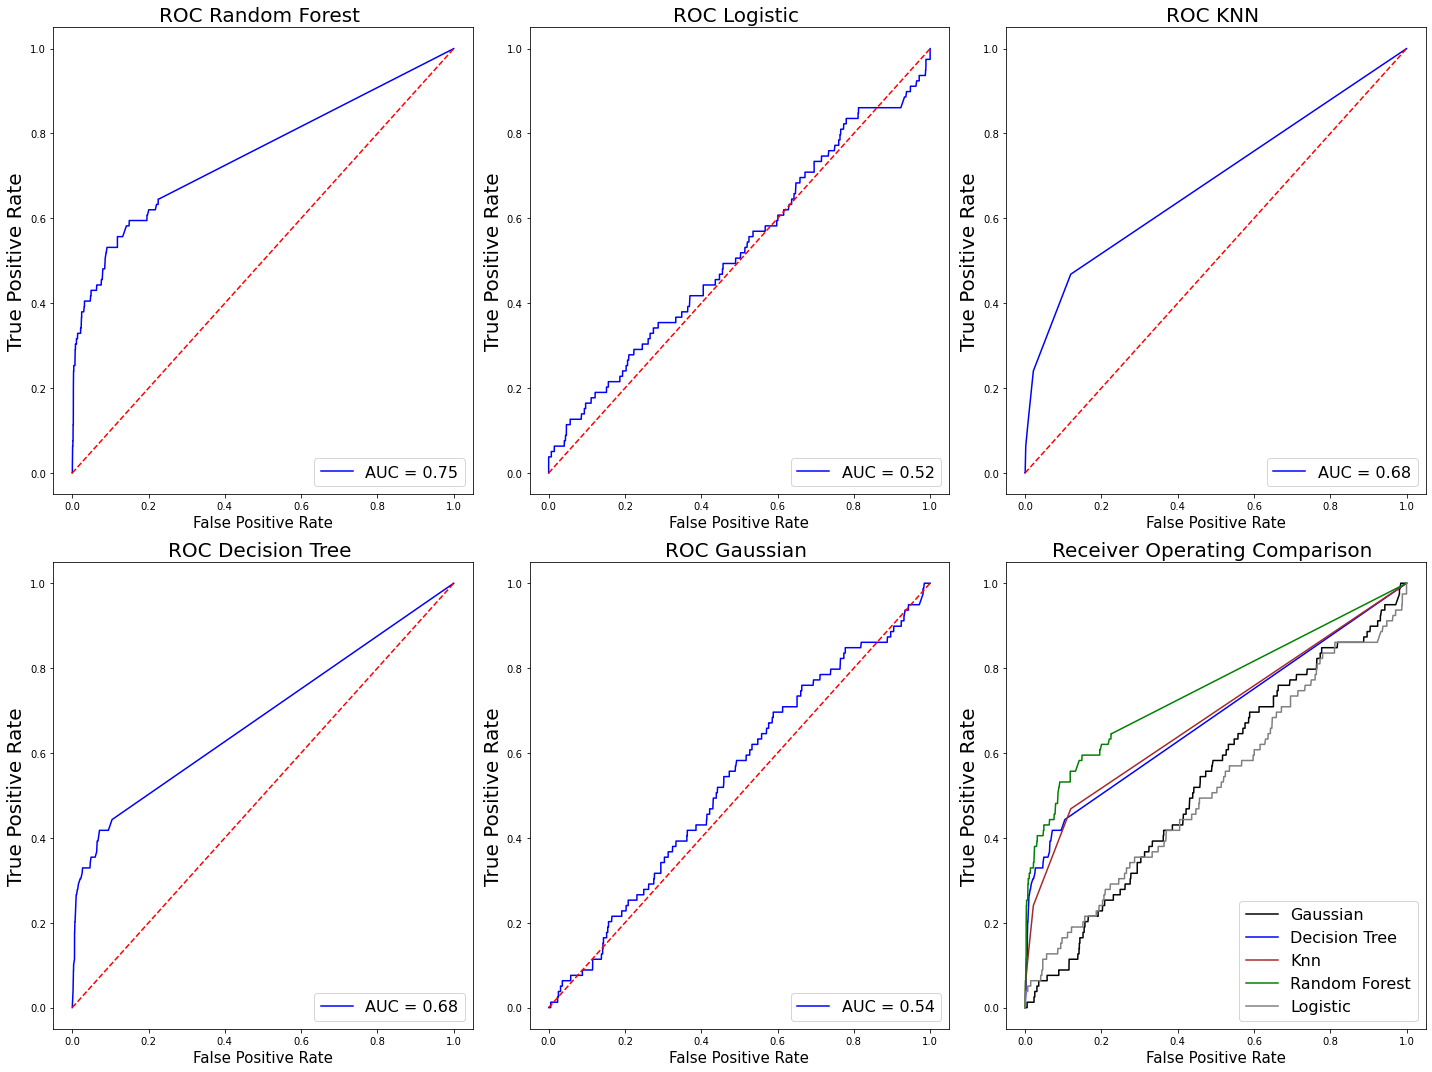

In [68]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
from sklearn import metrics

#RandomForest
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Random Forest ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#LOGREG
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Logistic ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN
probs = knn1.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#Gaussian NB
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

# Decision Tree
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()

Na podstawie powyższych wybieramy model Random Forest.

## Optymalizacja Random Forest

In [69]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
rf.fit(X_train, y_train)
ac = accuracy_score(y_test,rf.predict(X_test))
print('Accuracy dla Random Forest wynosi: ',ac, '\n')

Accuracy dla Random Forest wynosi:  0.9824098504837291 



In [70]:
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
import warnings

sm = SMOTE(random_state=1)
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_resampled))

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled)
X_train_smote.shape, X_test_smote.shape, y_train_smote.shape, y_test_smote.shape, X_resampled.shape, y_resampled.shape

rf.fit(X_train_smote, y_train_smote)

Original dataset shape: Counter({0: 22315, 1: 422})
Resampled dataset shape: Counter({0: 17846, 1: 17846})


RandomForestClassifier(random_state=1)

In [71]:
preds1 = rf.predict(X_test_smote)
accs1 = np.mean(y_test_smote == preds1)
print(accs1)


0.9811722514849266


In [75]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

                feature  importance
14                  AGE        0.17
13               INCOME        0.17
4      NAME_INCOME_TYPE        0.10
12      CNT_FAM_MEMBERS        0.08
3          CNT_CHILDREN        0.07
2       FLAG_OWN_REALTY        0.07
5   NAME_EDUCATION_TYPE        0.06
0           CODE_GENDER        0.06
1          FLAG_OWN_CAR        0.06
10           FLAG_PHONE        0.05
9       FLAG_WORK_PHONE        0.04
6    NAME_FAMILY_STATUS        0.03
7     NAME_HOUSING_TYPE        0.02
11           FLAG_EMAIL        0.02
8            FLAG_MOBIL        0.00


In [90]:
from sklearn.model_selection import cross_val_score, GridSearchCV
random_forest = RandomForestClassifier(random_state = 1) 
params = {'n_estimators': [50, 100, 250, 500],
         'max_depth': [2, 3, 5, 10],
         'max_features': ['auto', 3, 5]}

In [91]:
grid = GridSearchCV(estimator=random_forest,
                   param_grid=params,
                   scoring='accuracy',
                   cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'max_features': ['auto', 3, 5],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='accuracy')

In [92]:
grid.best_params_

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 50}

In [93]:
grid.best_score_

0.9811424572913585

In [94]:
grid.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=1)

In [95]:
preds = grid.best_estimator_.predict(X_test)

In [96]:
np.mean(y_test == preds)

0.9826297273526825

In [100]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

#Ze względu na niezbilansowanie zbioru (default jest zdarzeniem bardzo rzadkim) z powyżej analizy wychodzi, 
# że cut off jest równy 0,0357.

1


In [144]:
scores=[]
def cutoff_predict(rf, X_train, cutoff):
    return grid.predict_proba(X_train)[:,1]>cutoff.astype(int)

def custom_f1(cutoff):
     def f1_cutoff(grid, X_train, y_train):
        ypred = cutoff_predict(grid, X_train, cutoff)
        return sklearn.metrics.f1_score(y_train, ypred)

for cutoff in np.arange(0.1, 0.9, 0.1):
    rf = RandomForestClassifier(max_depth=2, n_estimators=50, random_state=1)
    valid = cross_val_score(estimator=rf, X=X_train, y=y_train, scoring= custom_f1(cutoff))
    scores.append(valid)

In [145]:
scores

[array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327]),
 array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327]),
 array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327]),
 array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327]),
 array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327]),
 array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327]),
 array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327]),
 array([0.98130841, 0.98103353, 0.98103353, 0.98103353, 0.98130327])]

In [146]:
cutoff

0.8

## Wartość dodana dla banku

[[4291  178]
 [  47   32]]
[[4413   56]
 [  54   25]]
[[4420   49]
 [  55   24]]
[[4422   47]
 [  55   24]]
[[4424   45]
 [  55   24]]
[[4431   38]
 [  55   24]]
[[4432   37]
 [  55   24]]
[[4437   32]
 [  57   22]]
[[4456   13]
 [  66   13]]
[[4460    9]
 [  71    8]]
[[4460    9]
 [  71    8]]
[[4466    3]
 [  76    3]]
[[4468    1]
 [  78    1]]
[[4468    1]
 [  79    0]]


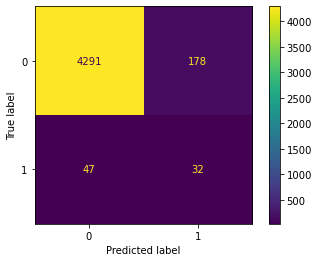

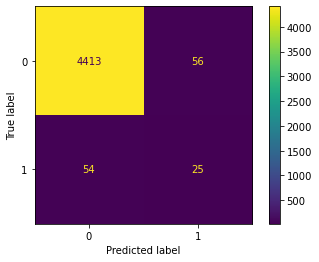

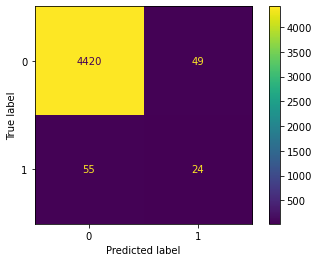

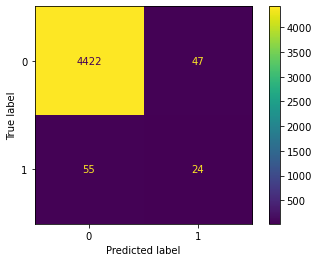

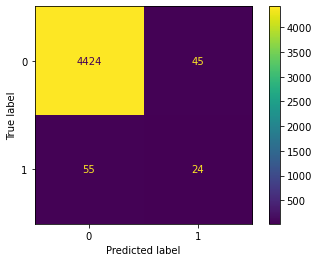

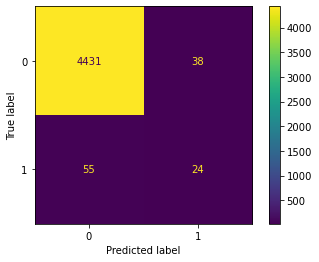

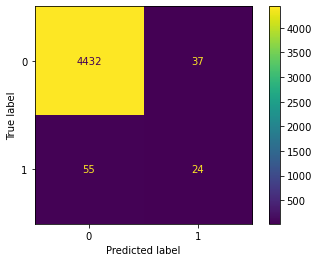

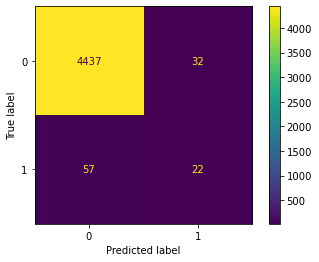

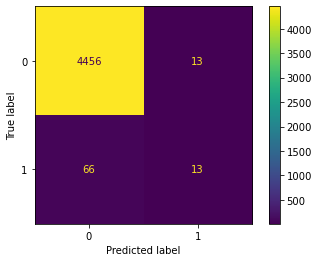

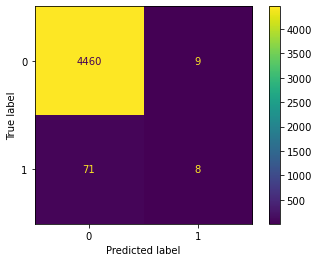

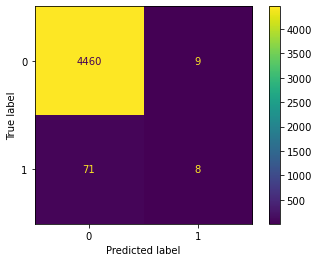

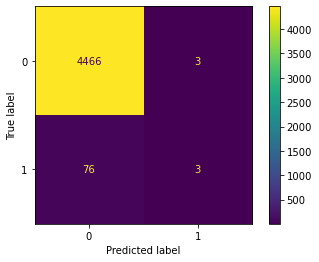

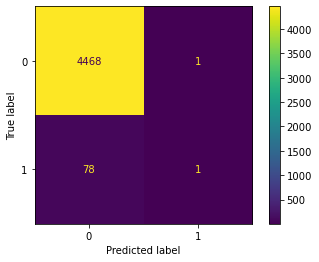

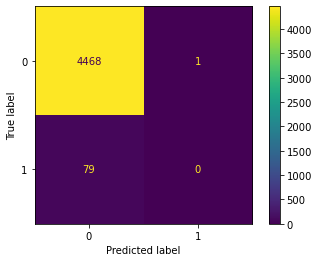

In [175]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import ConfusionMatrixDisplay

class CustomThreshold(BaseEstimator, ClassifierMixin):
    def __init__(self, base, threshold=0.5):
        self.base = base
        self.threshold = threshold
    def fit(self, *args, **kwargs):
        self.base.fit(*args, **kwargs)
        return self
    def predict(self, X):
        return (self.base.predict_proba(X)[:, 1] > self.threshold).astype(int)

rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
clf = [CustomThreshold(rf, threshold) for threshold in [0.1, 0.2, 0.22, 0.23, 0.24, 0.25, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]

for model in clf:
    cm = confusion_matrix(y_test, model.predict(X_test))
    print(cm)
    ConfusionMatrixDisplay(cm).plot()
    



Text(0.5, 1.0, 'Precision-Recall function')

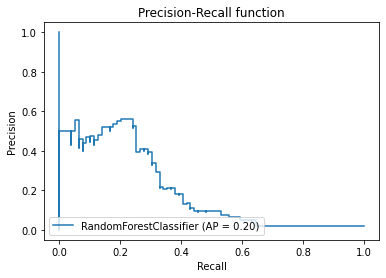

In [164]:
disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('Precision-Recall function')